<a href="https://colab.research.google.com/github/afiffadhlurrahman/KK-A/blob/main/FP_KK_A_KELOMPOK_1_FIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing

Secara garis besar di preprocessing ini yang dilakukan adalah memeriksa missing value, baris yang terduplikasi, dan drop fitur yang tak perlu

In [ ]:
# import semua libraries
import numpy as np 
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import ast
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier 
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

%matplotlib inline

### Ekstraksi data

In [ ]:
# # baca dataset dari file
# flight = pd.read_csv("flight.csv")
# hotel = pd.read_csv("hotel.csv")
# test = pd.read_csv("test.csv")

# baca dataset dari file
flight = pd.read_csv("/content/drive/My Drive/kka_fp/flight.csv")
hotel = pd.read_csv("/content/drive/My Drive/kka_fp/hotel.csv")
test = pd.read_csv("/content/drive/My Drive/kka_fp/test.csv")

* ### Baris awal dataset

In [ ]:
# tampilkan 5 baris awal dari dataset
print("Flight")
display(flight.head().transpose())
print("\nHotel")
display(hotel.head().transpose())
print("\nTest")
display(test.head().transpose())

Flight


,0,1,2,3,4
account_id,912aa410a02cd7e1bab414214a7005c0,d64a90a618202a5e8b25d8539377f3ca,1a42ac02bcb4a902973123323f84da55,92cddd64d4be4dec6dfbcc0c50e902f4,bf637abc47ea93bad22264f4956d67f6
order_id,5c6f39c690f23650d3cde28e5b51c908,5cbef2b87f51c18bf399d11bfe495a46,38fc35a1e62384012a358ab1fbd5ad03,c7f54cb748828b4413e02dea2758faf6,dec228e4d2b6023c9f1fe9cfe9c451bf
member_duration_days,566,607,648,418,537
gender,M,M,F,F,F
trip,trip,trip,trip,trip,trip
service_class,ECONOMY,ECONOMY,ECONOMY,ECONOMY,ECONOMY
price,885898,2.13975e+06,2.69555e+06,1.14666e+06,1.13103e+06
is_tx_promo,NO,NO,NO,NO,NO
no_of_seats,1,2,1,1,1
airlines_name,33199710eb822fbcfd0dc793f4788d30,0a102015e48c1f68e121acc99fca9a05,0a102015e48c1f68e121acc99fca9a05,0a102015e48c1f68e121acc99fca9a05,6c483c0812c96f8ec43bb0ff76eaf716



Hotel


,0,1,2,3,4
hotel_id,e2733e84102226acf6b53bffd2e60cf8,9f9de5df06d64ada1026e930687a87e4,3cf6774fb4dc331bb49e7a959b74a67e,eca261898220478834072b0c753a5229,c21f400013fa4f244a7168a3c155b8b5
starRating,0,0,0,0,0
city,bali,bali,bali,bali,bali
free_wifi,YES,YES,YES,YES,YES
pool_access,NO,NO,NO,NO,NO
free_breakfast,NO,NO,NO,NO,NO



Test


,0,1,2,3,4
account_id,89a5fadd4d596610ff56044b9a0b1f4f,86b28323bec6d938d47cee887e509b28,36ef956ac3ef963c48e67327a4b6cc78,f7821289404d44db50eb2edd4f82ea5b,f62f33d1de5aabc919b69b1b5697f27a
order_id,5ca64fd80a069208e3c0aa05dd580fb8,aca60904549a8a5958fe7a642efcb534,1771011e3adec5db9f30d15b3d439711,6fc1b7d590c2a8c539ce56397403194d,c1f4712f60cd758e773555690d148764
member_duration_days,1754,1084,2378,576,862
gender,M,F,M,F,F
trip,trip,trip,round,trip,trip
service_class,ECONOMY,ECONOMY,ECONOMY,ECONOMY,ECONOMY
price,3.1434e+06,2.16661e+06,1.23962e+06,1.98406e+06,2.99062e+06
is_tx_promo,YES,NO,NO,YES,YES
no_of_seats,3,2,1,2,1
airlines_name,e35de6a36d385711a660c72c0286154a,e35de6a36d385711a660c72c0286154a,ad5bef60d81ea077018f4d50b813153a,33199710eb822fbcfd0dc793f4788d30,74c5549aa99d55280a896ea50068a211


* asumsi berdasarkan pada head tiap datasets
* Flight
    - Data type:
        - string (represents hash value): 3 (`account_id`, `order_id`, `airlines_name`)
        - integer: 3 (`member_duration_days`, `price`, `no_of_seats`)
        - string: 6 (`gender`, `trip`, `service_class`, `is_tx_promo`, `route`, `hotel_id`)
        - string (represents list): 2 (`visited_city`, `log_transaction`)
* Hotel
    - Data type:
        - string (represents hash value): 1 (`hotel_id`)
        - int: 1 (`starRating`)
        - string: 4 (`city`, `free_wifi`, `pool_access`, `free_breakfast`)
* Test
    - Data type:
        - string (represents hash value): 3 (`account_id`, `order_id`, `airlines_name`)
        - integer: 3 (`member_duration_days`, `price`, `no_of_seats`)
        - string: 5 (`gender`, `trip`, `service_class`, `is_tx_promo`, `route`)
        - string (represents list): 2 (`visited_city`, `log_transaction`)    

Notes:
- String yang merepresentasikan list butuh diolah di feature engineering

* ### Bentuk dari tiap dataset

In [ ]:
# tampilkan berapa baris dan kolom dari tiap dataset
print("Shape of:")
print("1. flight\t", flight.shape, "\n2. hotel\t", hotel.shape, "\n3. test\t\t", test.shape)

Shape of:
1. flight	 (117946, 14) 
2. hotel	 (2962, 6) 
3. test		 (10000, 13)


* Flight punya **117946** baris dan **14** kolom
* Hotel punya **2962** baris and **6** kolom
* Test punya **10000** baris and **13** kolom (1 kolom lebih sedikit dari Flight)

### Fitur tiap dataset

In [ ]:
# show what features each dataset have
print("Flight")
display(flight.columns.values)
print("\nHotel")
display(hotel.columns.values)
print("\nTest")
display(test.columns.values)

Flight


array(['account_id', 'order_id', 'member_duration_days', 'gender', 'trip',
       'service_class', 'price', 'is_tx_promo', 'no_of_seats',
       'airlines_name', 'route', 'hotel_id', 'visited_city',
       'log_transaction'], dtype=object)


Hotel


array(['hotel_id', 'starRating', 'city', 'free_wifi', 'pool_access',
       'free_breakfast'], dtype=object)


Test


array(['account_id', 'order_id', 'member_duration_days', 'gender', 'trip',
       'service_class', 'price', 'is_tx_promo', 'no_of_seats',
       'airlines_name', 'route', 'visited_city', 'log_transaction'],
      dtype=object)

Test dan Flight punya fitur yang sama **kecuali** `hotel_id`

### Statistic tiap dataset

In [ ]:
# give statistic summary of numerical data and categorical data on each dataset
print("Flight")
display(flight.describe(include=np.number).transpose())
display(flight.describe(include=np.object).transpose())
print("\nHotel")
display(hotel.describe(include=np.number).transpose())
display(hotel.describe(include=np.object).transpose())
print("\nTest")
display(test.describe(include=np.number).transpose())
display(test.describe(include=np.object).transpose())

Flight


,count,mean,std,min,25%,50%,75%,max
member_duration_days,117946.0,9.555870e+02,5.652924e+02,329.0,537.0,678.00,1341.0,2720.0
price,117946.0,2.672772e+06,2.449247e+06,406952.0,1282710.0,1987061.44,2974400.0,59036432.0
no_of_seats,117946.0,1.688595e+00,1.133721e+00,1.0,1.0,1.00,2.0,11.0


,count,unique,top,freq
account_id,117946,74796,d64a90a618202a5e8b25d8539377f3ca,3311
order_id,117946,117946,b556834fe82ad64576fa217c23f7d057,1
gender,117946,3,M,61036
trip,117946,3,trip,99148
service_class,117946,2,ECONOMY,117665
is_tx_promo,117946,2,NO,67621
airlines_name,117946,8,6c483c0812c96f8ec43bb0ff76eaf716,36669
route,117946,1,CGK - DPS,117946
hotel_id,117946,676,None,111198
visited_city,117946,8,"'['Jakarta', 'Medan', 'Bali']'",38101



Hotel


,count,mean,std,min,25%,50%,75%,max
starRating,2962.0,2.992235,1.270136,0.0,2.0,3.0,4.0,5.0


,count,unique,top,freq
hotel_id,2962,2962,5568b82939235847a9bbe5f096302bd4,1
city,2962,1,bali,2962
free_wifi,2962,2,YES,2947
pool_access,2962,2,NO,2953
free_breakfast,2962,2,NO,2217



Test


,count,mean,std,min,25%,50%,75%,max
member_duration_days,10000.0,9.600881e+02,5.679171e+02,329.0,535.0,682.000,1348.0,2710.0
price,10000.0,2.682194e+06,2.398099e+06,320593.0,1304849.0,2019924.335,2988765.0,38555153.0
no_of_seats,10000.0,1.692800e+00,1.111374e+00,1.0,1.0,1.000,2.0,10.0


,count,unique,top,freq
account_id,10000,8724,d64a90a618202a5e8b25d8539377f3ca,209
order_id,10000,10000,c845cd4e78d936d33a24f6dfff21ab99,1
gender,10000,2,M,5147
trip,10000,3,trip,8399
service_class,10000,2,ECONOMY,9970
is_tx_promo,10000,2,NO,5326
airlines_name,10000,6,6c483c0812c96f8ec43bb0ff76eaf716,3147
route,10000,1,CGK - DPS,10000
visited_city,10000,8,"'['Jakarta', 'Medan', 'Bali']'",3199
log_transaction,10000,10000,"'[6288062.69, 5892239.47, 1659580.0, 1837030.0]'",1


* Flight
    - Numerical(ordinal): mean > median (right skewed)
    - Categorical:
        - `account_id`: 74796 unique values **(will be dropped later because it would be noise)**
        - `order_id`: 117946 unique values **(will be used as index later because it has the same amount with dataset's record)**
        - `gender`: 3 unique values
        - `airlines_name`: 8 unique values
        - `route`: 1 unique value **(will be dropped later because it doesn't affect our response variable)**
        - `hotel_id`: 676 unique values
        - `visited_city`: 8 unique values **(need to get feature engineered)**
        - `log_transaction`: 117946 unique values **(need to get feature engineered)**
* Hotel
    - Numerical(ordinal): mean < median (left skewed)
    - Categorical
        - `hotel_id`: 2962 unique values **(need to get feature engineered)**
        - `city`: 1 unique values **(will be dropped later because it doesn't affect our response variable)**
* Test
    - Numerical(ordinal): mean > median (right skewed)
    - Categorical
        - `account_id`: 8724 unique values **(will be dropped later because it would be noise)**
        - `order_id`: 10000 unique values **(will be used as index later because it has the same amount with dataset's record)**
        - `gender`: 2 unique values
        - `airlines_name`: 6 unique values
        - `route`: 1 unique value **(will be dropped later because it doesn't affect our response variable)**
        - `visited_city`: 8 unique values **(need to get feature engineered)**
        - `log_transaction`: 117946 unique values **(need to get feature engineered)**        

Notes:         
* Flight punya **117946** record, Hotel punya **2962** record, and Test punya **10000** record
* sisa fitur pada Flight dan Test memiliki jumlah yang sama dari nilai unik value
* sisa fitur pada Hotel sama dengan output

### Cek record terduplikasi

In [ ]:
# check the duplicated record and sum it up
print("Flight: ", flight.duplicated(keep=False).sum())
print("\nHotel: ", hotel.duplicated(keep=False).sum())
print("\nTest: ", test.duplicated(keep=False).sum())

Flight:  0

Hotel:  0

Test:  0


Tidak ada dataset yang memiliki record terduplikasi

### Cek missing values

In [ ]:
# check missing value and sum it up
print("Flight")
display(flight.isnull().sum())
print("\nHotel")
display(hotel.isnull().sum())
print("\nTest")
display(test.isnull().sum())

Flight


account_id              0
order_id                0
member_duration_days    0
gender                  0
trip                    0
service_class           0
price                   0
is_tx_promo             0
no_of_seats             0
airlines_name           0
route                   0
hotel_id                0
visited_city            0
log_transaction         0
dtype: int64


Hotel


hotel_id          0
starRating        0
city              0
free_wifi         0
pool_access       0
free_breakfast    0
dtype: int64


Test


account_id              0
order_id                0
member_duration_days    0
gender                  0
trip                    0
service_class           0
price                   0
is_tx_promo             0
no_of_seats             0
airlines_name           0
route                   0
visited_city            0
log_transaction         0
dtype: int64

Tidak ada dataset yang memiliki a missing value

### Drop fitur tak berguna

In [ ]:
# drop unimportant columns from dataset
flight = flight.drop(columns=['account_id','route'],axis=1)
hotel = hotel.drop(columns='city',axis=1)
test = test.drop(columns=['account_id','route'],axis=1)

### Set index untuk tiap datasets

In [ ]:
# set index based on amount of unique values of each dataset
flight = flight.set_index('order_id')
hotel = hotel.set_index('hotel_id')
test = test.set_index('order_id')

print("Flight ", flight.shape)
display(flight.head().transpose())
print("\nHotel ", hotel.shape)
display(hotel.head().transpose())
print("\nTest ", test.shape)
display(test.head().transpose())

Flight  (117946, 11)


order_id,5c6f39c690f23650d3cde28e5b51c908,5cbef2b87f51c18bf399d11bfe495a46,38fc35a1e62384012a358ab1fbd5ad03,c7f54cb748828b4413e02dea2758faf6,dec228e4d2b6023c9f1fe9cfe9c451bf
member_duration_days,566,607,648,418,537
gender,M,M,F,F,F
trip,trip,trip,trip,trip,trip
service_class,ECONOMY,ECONOMY,ECONOMY,ECONOMY,ECONOMY
price,885898,2.13975e+06,2.69555e+06,1.14666e+06,1.13103e+06
is_tx_promo,NO,NO,NO,NO,NO
no_of_seats,1,2,1,1,1
airlines_name,33199710eb822fbcfd0dc793f4788d30,0a102015e48c1f68e121acc99fca9a05,0a102015e48c1f68e121acc99fca9a05,0a102015e48c1f68e121acc99fca9a05,6c483c0812c96f8ec43bb0ff76eaf716
hotel_id,None,None,None,None,None
visited_city,"'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'['Jakarta', 'Medan', 'Bali']'","'['Semarang', 'Jakarta', 'Medan', 'Bali']'","'['Jogjakarta', 'Bali', 'Jakarta', 'Medan']'","'['Jakarta', 'Bali', 'Medan', 'Jogjakarta', 'S..."



Hotel  (2962, 4)


hotel_id,e2733e84102226acf6b53bffd2e60cf8,9f9de5df06d64ada1026e930687a87e4,3cf6774fb4dc331bb49e7a959b74a67e,eca261898220478834072b0c753a5229,c21f400013fa4f244a7168a3c155b8b5
starRating,0,0,0,0,0
free_wifi,YES,YES,YES,YES,YES
pool_access,NO,NO,NO,NO,NO
free_breakfast,NO,NO,NO,NO,NO



Test  (10000, 10)


order_id,5ca64fd80a069208e3c0aa05dd580fb8,aca60904549a8a5958fe7a642efcb534,1771011e3adec5db9f30d15b3d439711,6fc1b7d590c2a8c539ce56397403194d,c1f4712f60cd758e773555690d148764
member_duration_days,1754,1084,2378,576,862
gender,M,F,M,F,F
trip,trip,trip,round,trip,trip
service_class,ECONOMY,ECONOMY,ECONOMY,ECONOMY,ECONOMY
price,3.1434e+06,2.16661e+06,1.23962e+06,1.98406e+06,2.99062e+06
is_tx_promo,YES,NO,NO,YES,YES
no_of_seats,3,2,1,2,1
airlines_name,e35de6a36d385711a660c72c0286154a,e35de6a36d385711a660c72c0286154a,ad5bef60d81ea077018f4d50b813153a,33199710eb822fbcfd0dc793f4788d30,74c5549aa99d55280a896ea50068a211
visited_city,"'['Bali', 'Jakarta', 'Medan']'","'['Medan', 'Bali', 'Jakarta']'","'['Jakarta', 'Medan', 'Bali']'","'['Jakarta', 'Bali', 'Medan', 'Jogjakarta', 'S...","'['Bali', 'Jakarta', 'Medan']'"
log_transaction,"'[568508.04, 245284.05, 748834.2, 7930226.7, 6...","'[9916349.28, 7404847.79, 4697159.89, 2166607....","'[249468.18, 1854801.11, 3311742.08, 4002723.4...","'[6137034.61, 58939.21, 1984060.0]'","'[9653724.83, 6417438.6, 2990624.0]'"


# Exploratory Data Analysis

Di tahap ini kami mengecek 

### Info of each datasets (data type, entries, etc)

In [ ]:
print("Flight")
flight.info()
print("\nHotel")
hotel.info()
print("\nTest")
test.info()

Flight
<class 'pandas.core.frame.DataFrame'>
Index: 117946 entries, 5c6f39c690f23650d3cde28e5b51c908 to 0f568900ff006e53506b2a4ade68e8e2
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   member_duration_days  117946 non-null  float64
 1   gender                117946 non-null  object 
 2   trip                  117946 non-null  object 
 3   service_class         117946 non-null  object 
 4   price                 117946 non-null  float64
 5   is_tx_promo           117946 non-null  object 
 6   no_of_seats           117946 non-null  float64
 7   airlines_name         117946 non-null  object 
 8   hotel_id              117946 non-null  object 
 9   visited_city          117946 non-null  object 
 10  log_transaction       117946 non-null  object 
dtypes: float64(3), object(8)
memory usage: 10.8+ MB

Hotel
<class 'pandas.core.frame.DataFrame'>
Index: 2962 entries, e2733e84102226acf6b53bffd2e60cf8 to

Update assumption based on info of each datasets
* Flight
    - Data type:
        - object:
            - string (represents hash value): 1 (`airlines_name`)
            - string: 5 (`gender`, `trip`, `service_class`, `is_tx_promo`, `hotel_id`)
            - string (represents list): 2 (`visited_city`, `log_transaction`)
        - float:
            - float64: 3 (`member_duration_days`, `price`, `no_of_seats`)
* Hotel
    - Data type:
        - object:
            - string: 3 (`free_wifi`, `pool_access`, `free_breakfast`)
        - float:
            - float64: 1 (`starRating`)
* Test
    - Data type:
        - object:
            - string (represents hash value): 1 (`airlines_name`)
            - string: 4 (`gender`, `trip`, `service_class`, `is_tx_promo`)
            - string (represents list): 2 (`visited_city`, `log_transaction`)    
        - int:
            - int64: 2 (`member_duration_days`, `no_of_seats`)
        - float:
            - float64: 1 (`price`)

Notes:
- String that represents list needs to get feature engineered

### Check correlation on numeric features

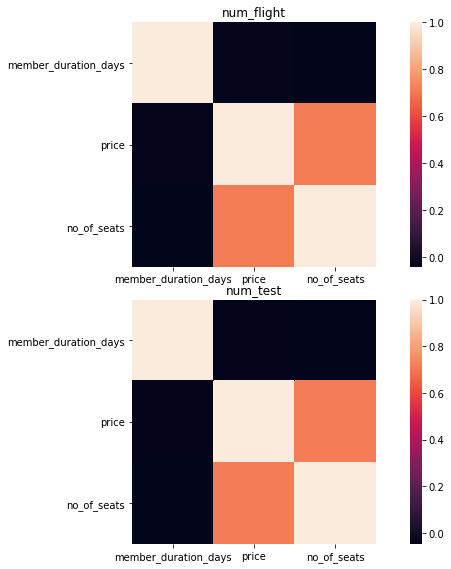

In [ ]:
num_flight = flight.dtypes[flight.dtypes != 'object'].index
num_test = test.dtypes[test.dtypes != 'object'].index

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.tight_layout()
plt.title("num_flight")
sn.heatmap(flight[num_flight].corr(),square=True)

plt.subplot(212)
plt.tight_layout()
plt.title("num_test")
sn.heatmap(test[num_test].corr(),square=True)

### Check frequencies of unique values on each feature per datasets

Flight


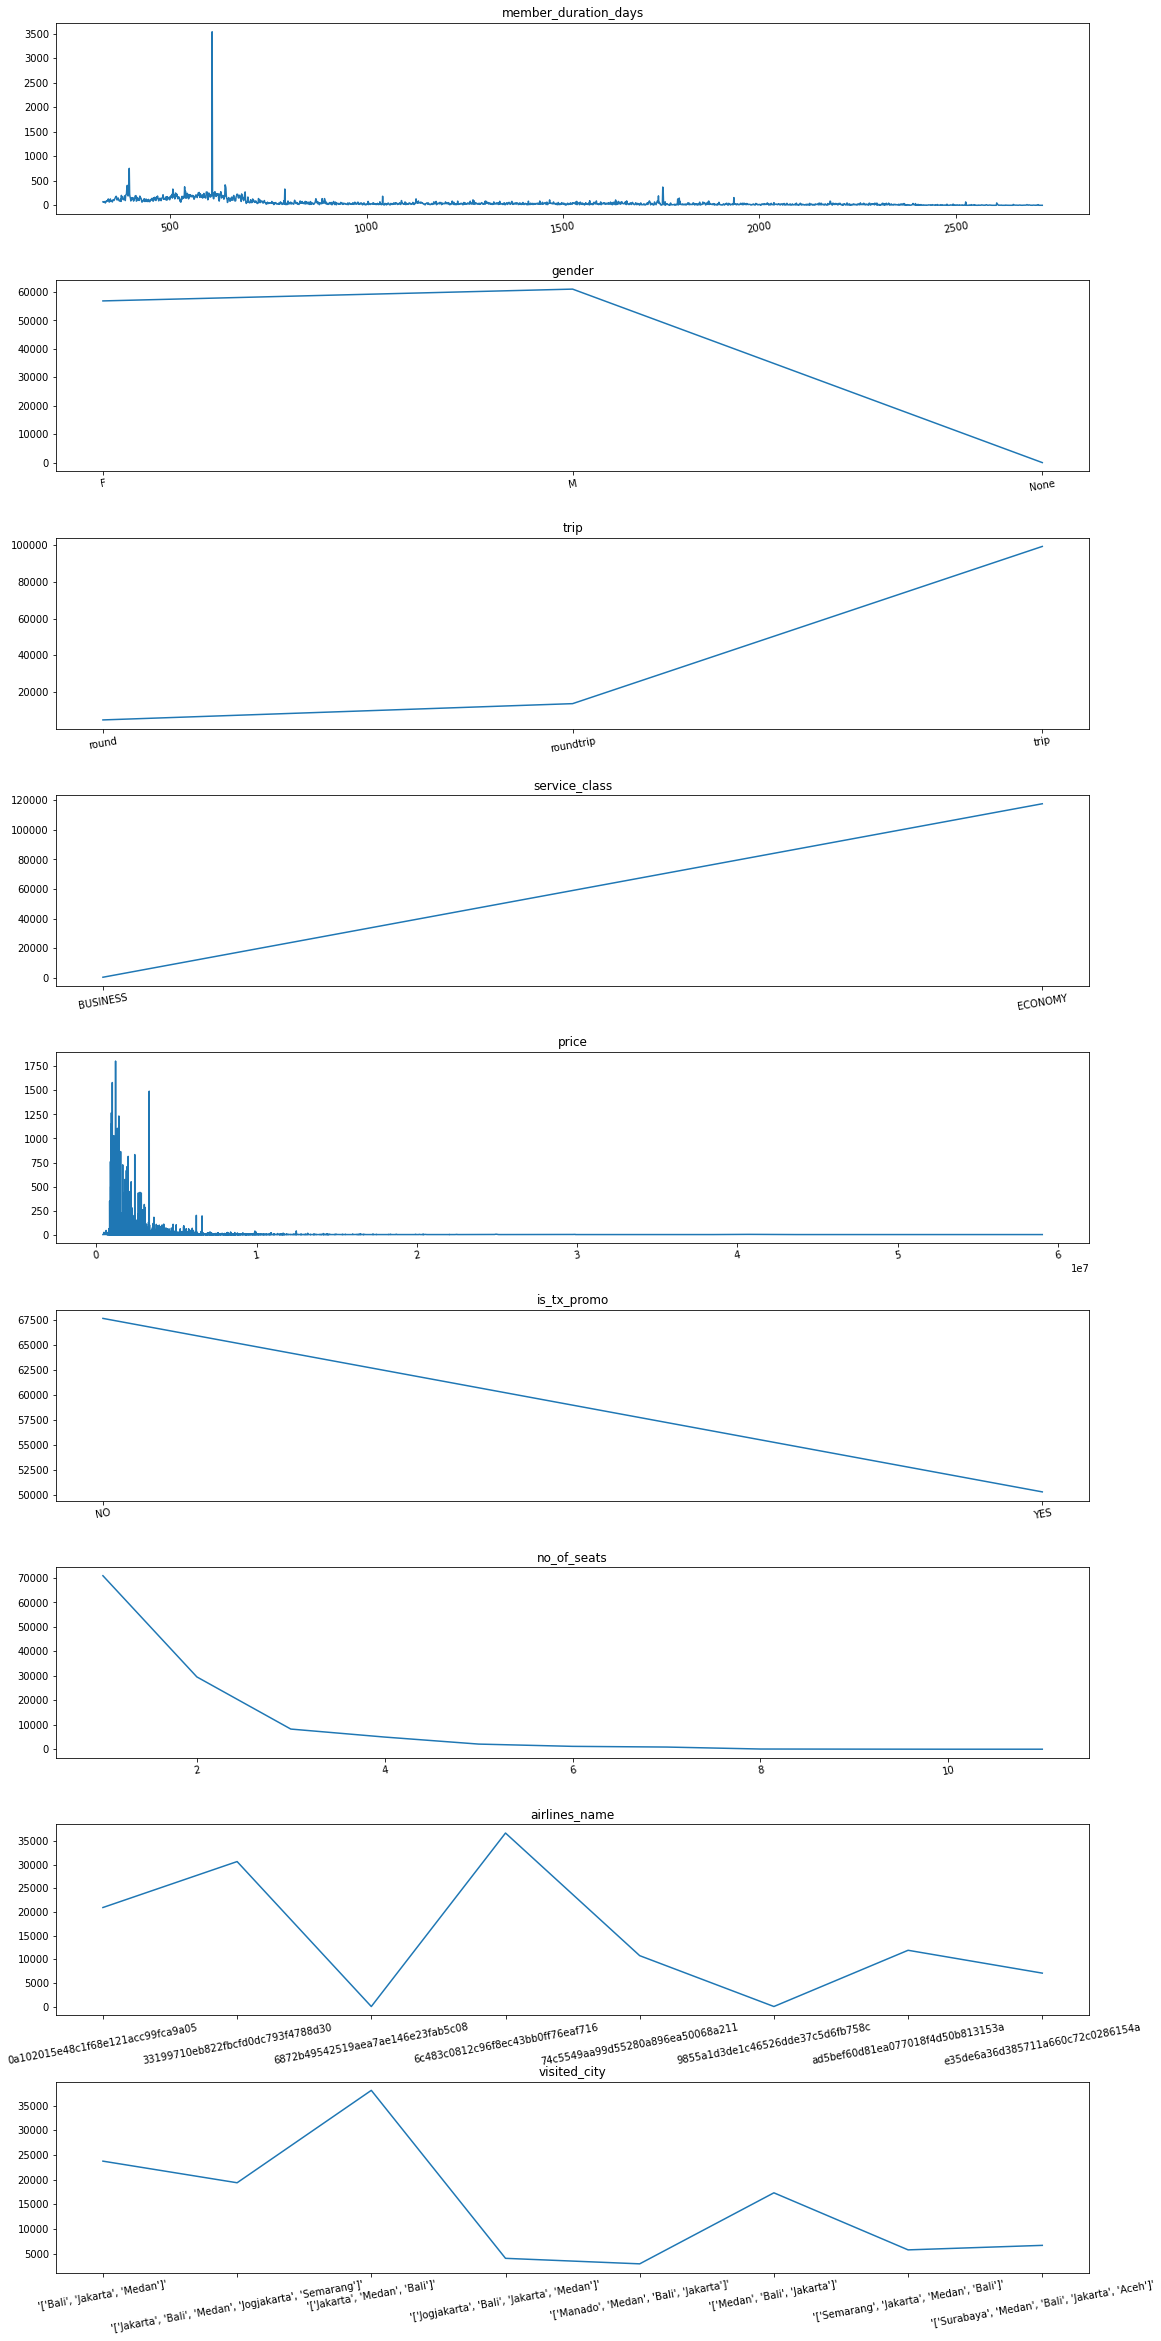

In [ ]:
print("Flight")
plt.figure(figsize=(16,32))
columns = flight.columns.drop(['log_transaction', 'hotel_id'])
for col, plotCounter in zip(columns, range(len(columns))):
    plot = flight[col].value_counts().sort_index()
    plt.subplot(len(columns), 1, plotCounter + 1)
    plt.tight_layout()
    plt.title(col)
    plt.xticks(rotation=10)
    plt.plot(plot)

Hotel


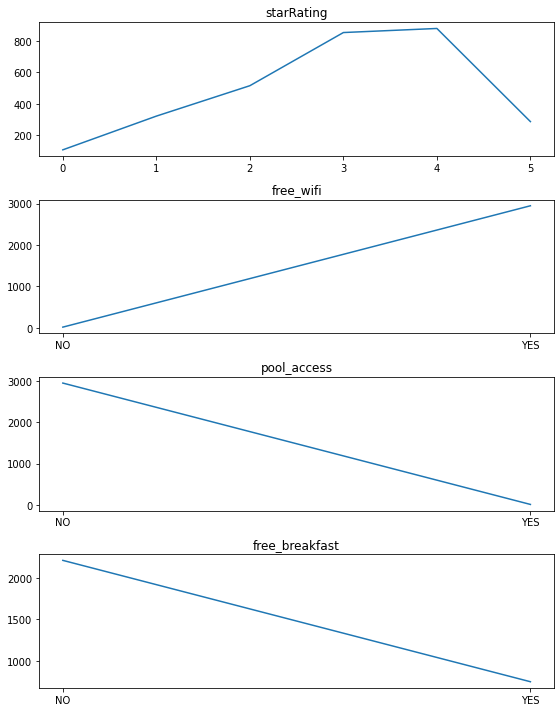

In [ ]:
print("Hotel")
plt.figure(figsize=(8,10))
for col, plotCounter in zip(hotel.columns, range(len(hotel.columns))):
    plot = hotel[col].value_counts().sort_index()
    plt.subplot(len(hotel.columns), 1, plotCounter + 1)
    plt.tight_layout()
    plt.title(col)
    plt.plot(plot)

Test


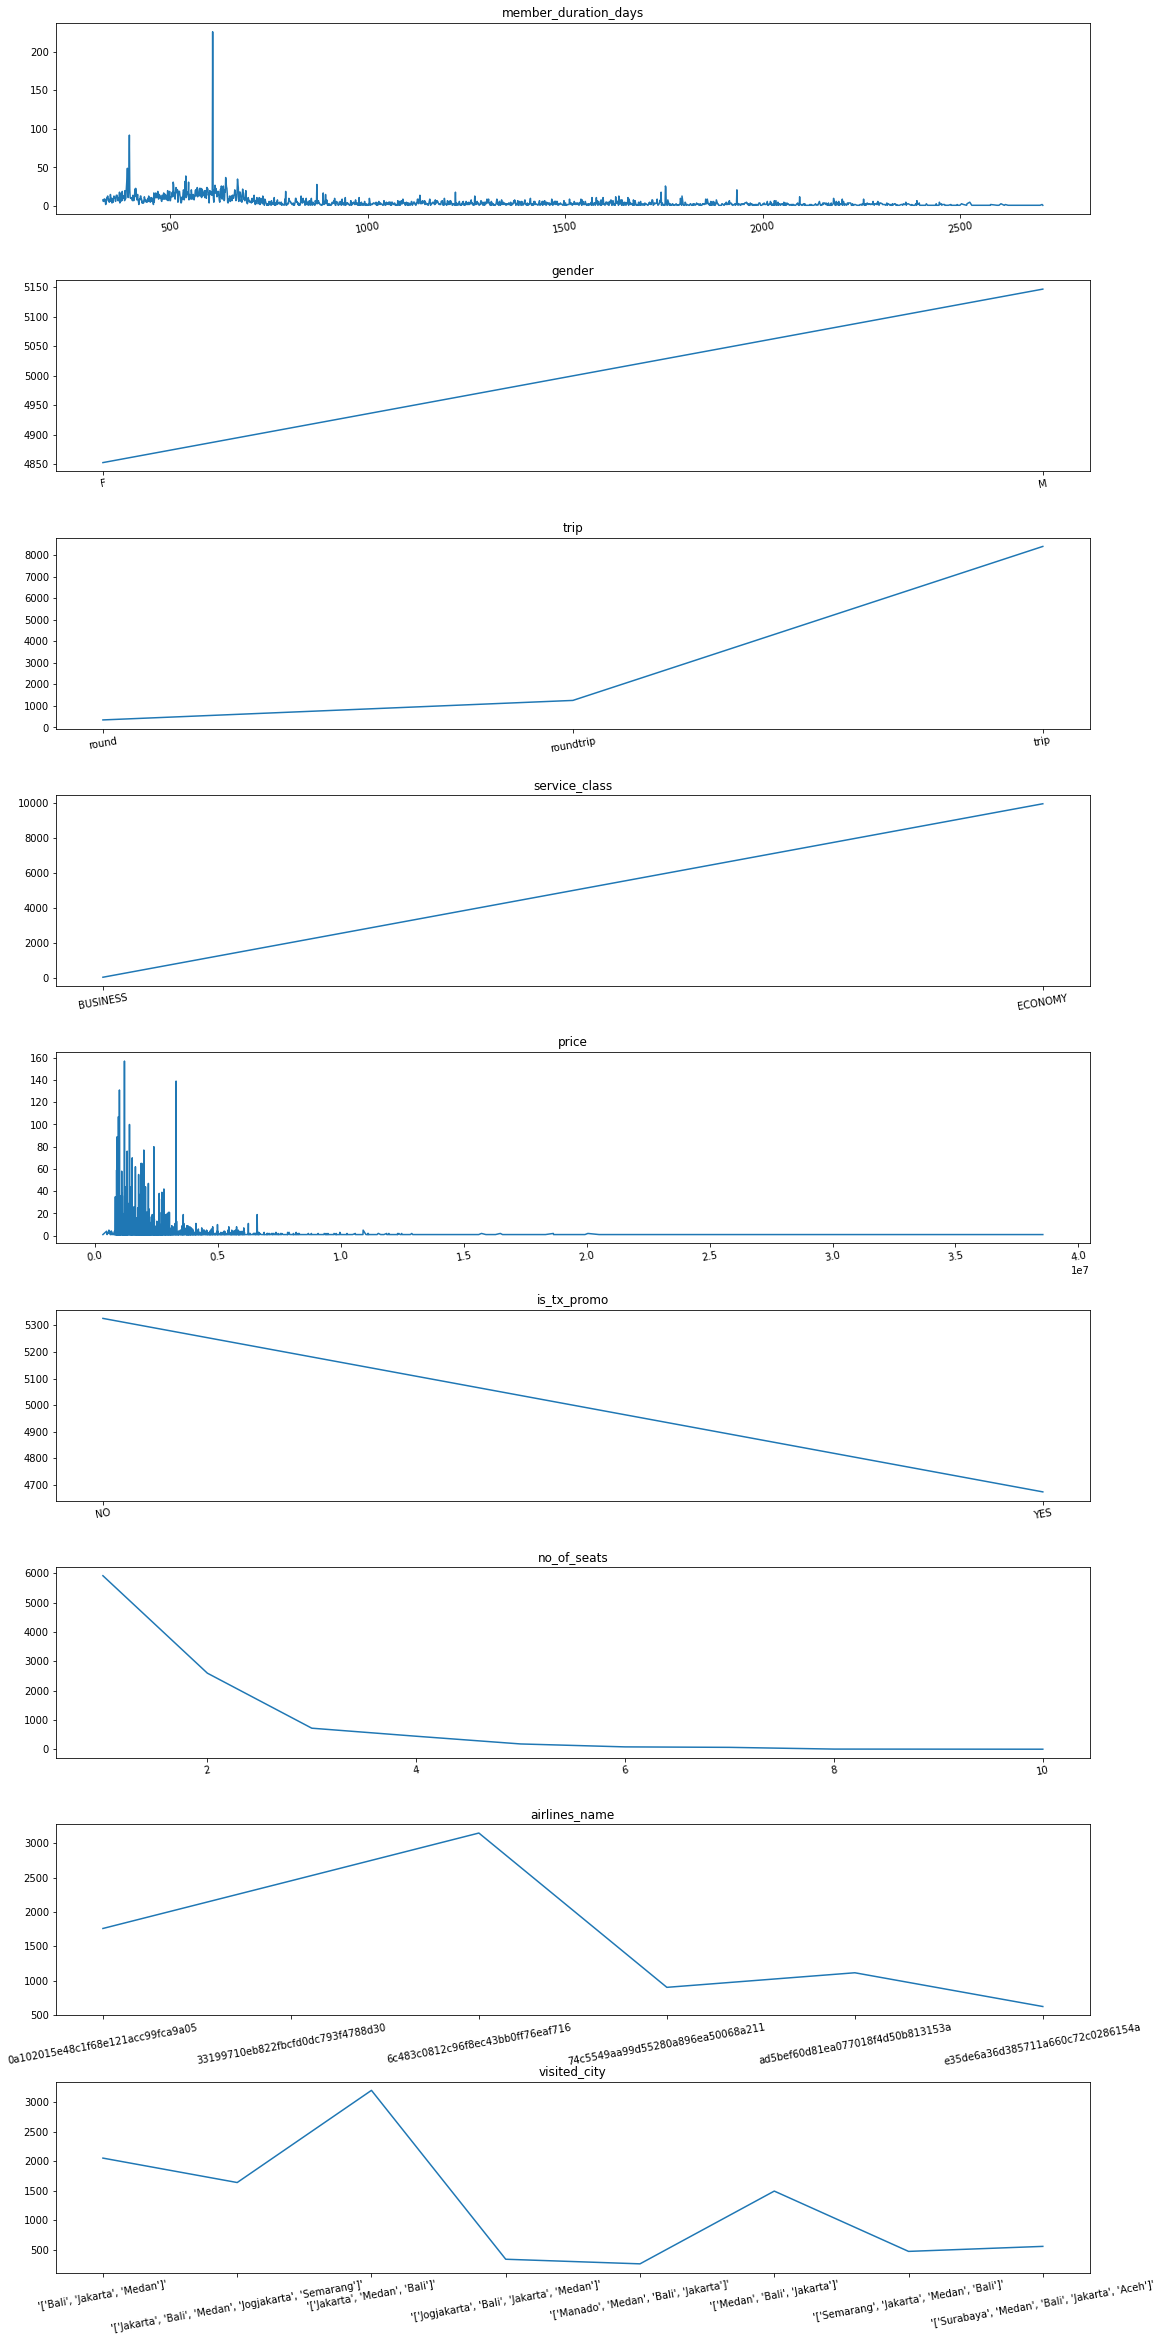

In [ ]:
print("Test")
plt.figure(figsize=(16,32))
columns = test.columns.drop(['log_transaction'])
for col, plotCounter in zip(columns, range(len(columns))):
    plot = test[col].value_counts().sort_index()
    plt.subplot(len(columns), 1, plotCounter + 1)
    plt.tight_layout()
    plt.title(col)
    plt.xticks(rotation=10)
    plt.plot(plot)

* None in Flight's `gender` needs to be replaced with mode of it
* Both `round` and `roundtrip` in Flight and Test need to be united on 1 value
* In `visited_city`, 'Jakarta', 'Bali' and 'Medan' always appear on all variation

# Feature Engineering

### Make min, max, sum, median and mean of float in `log_transaction`

In [ ]:
def aggrOfLogTransaction(cell):
    temp = ast.literal_eval(cell[1:-1])
    temp = np.array(temp).astype(np.float)
    minLT = temp.min()
    maxLT = temp.max()
    sumLT = temp.sum()
    medianLT = np.median(temp)
    meanLT = temp.mean()
    return minLT, maxLT, sumLT, medianLT, meanLT

In [ ]:
%%time
columns = ['minLT','maxLT','sumLT','medianLT','meanLT']
log_transaction = pd.DataFrame(np.array([[0.0 for _ in range(5)] for _ in range(len(flight))]), \
                               index=flight.index,columns=columns)
for counter in range(len(flight)):
    log_transaction.iloc[counter, 0:5] = aggrOfLogTransaction(flight['log_transaction'][counter])
flight = flight.drop(columns='log_transaction')
flight = pd.concat((flight,log_transaction),axis = 1)
print("Flight")
flight.head()

Flight
CPU times: user 43.7 s, sys: 23.6 ms, total: 43.7 s
Wall time: 43.9 s


In [ ]:
%%time
log_transaction = pd.DataFrame(np.array([[0.0 for _ in range(5)] for _ in range(len(test))]), \
                               index=test.index,columns=columns)
for counter in range(len(test)):
    log_transaction.iloc[counter, 0:5] = aggrOfLogTransaction(test['log_transaction'][counter])
test = test.drop(columns='log_transaction')
test = pd.concat((test,log_transaction),axis = 1)
print("Test")
test.head()

Test
CPU times: user 3.4 s, sys: 9.42 ms, total: 3.41 s
Wall time: 3.42 s


### Split `visited_city` values into different feature (one-hot encoding)

In [ ]:
# list unique city
cities = {}
for listCity in flight.visited_city.unique():
    listCity = ast.literal_eval(listCity[1:-1])
    for city in listCity:
        if(cities.get(city) == None):
            cities.update({city:1})
del cities['Bali']
del cities['Jakarta']
del cities['Medan']
cities

{'Aceh': 1, 'Jogjakarta': 1, 'Manado': 1, 'Semarang': 1, 'Surabaya': 1}

In [ ]:
# concat Flight and Test to default 0.0 (dataframe of 5 cities feature)
visited_city = pd.DataFrame(np.array([[0.0 for _ in range(len(cities))] for _ in range(len(flight))]),index=flight.index,columns=cities.keys())
flight = pd.concat((flight,visited_city),axis = 1)
visited_city = pd.DataFrame(np.array([[0.0 for _ in range(len(cities))] for _ in range(len(test))]),index=test.index,columns=cities.keys())
test = pd.concat((test,visited_city),axis = 1)

In [ ]:
def OHEncoding(cell, dataframe, index):
    cell = ast.literal_eval(cell[1:-1])
    for city in cell:
        if(city != 'Jakarta' and city != 'Bali' and city != 'Medan'):
            dataframe[city][index] = 1

In [ ]:
%%time
for counter in range(len(flight)):
    OHEncoding(flight['visited_city'][counter], flight, counter)
flight = flight.drop(columns='visited_city')
print("Flight")
flight.head().transpose()

Flight
CPU times: user 7.06 s, sys: 6.91 ms, total: 7.07 s
Wall time: 7.09 s


In [ ]:
%%time
for counter in range(len(test)):
    OHEncoding(test['visited_city'][counter], test, counter)
test = test.drop(columns='visited_city')
print("Test")
test.head().transpose()

Test
CPU times: user 593 ms, sys: 766 µs, total: 594 ms
Wall time: 596 ms


### Handling None in Flight `gender`

In [ ]:
display(flight['gender'].value_counts())
flight['gender'] = flight['gender'].replace('None',flight['gender'].mode()[0])
display(flight['gender'].value_counts())

M       61036
F       56886
None       24
Name: gender, dtype: int64

M    61060
F    56886
Name: gender, dtype: int64

### Handling `round` and `roundtrip` in Flight and Test

In [ ]:
print("Flight")
display(flight['trip'].value_counts())
flight['trip'] = flight['trip'].replace('roundtrip','round')
display(flight['trip'].value_counts())

print("Test")
display(test['trip'].value_counts())
test['trip'] = test['trip'].replace('roundtrip','round')
display(test['trip'].value_counts())

Flight


trip         99148
roundtrip    13816
round         4982
Name: trip, dtype: int64

trip     99148
round    18798
Name: trip, dtype: int64

Test


trip         8399
roundtrip    1253
round         348
Name: trip, dtype: int64

trip     8399
round    1601
Name: trip, dtype: int64

### Merge Hotel dataset to Flight and Test

In [ ]:
def setHotelFeatures(df):
    for hid in hotelID:
    #     flight[flight['hotel_id'] == hid].loc[:,'starRating':] = hotel.loc[hid]
        if(hid in hotel.index):
            df['starRating'][df['hotel_id'] == hid] = hotel.loc[hid][0]
            df['free_wifi'][df['hotel_id'] == hid] = hotel.loc[hid][1]
            df['pool_access'][df['hotel_id'] == hid] = hotel.loc[hid][2]
            df['free_breakfast'][df['hotel_id'] == hid] = hotel.loc[hid][3]
        else:
            df['starRating'][df['hotel_id'] == hid] = hotel['starRating'].median()
            df['free_wifi'][df['hotel_id'] == hid] = hotel['free_wifi'].mode()[0]
            df['pool_access'][df['hotel_id'] == hid] = hotel['pool_access'].mode()[0]
            df['free_breakfast'][df['hotel_id'] == hid] = hotel['free_breakfast'].mode()[0]

In [ ]:
# # flight[flight['hotel_id'] == 'cd8210b5c97be3564a4cd0283dda323f'].loc[:,'starRating':].transpose()
# flight['starRating'][flight['hotel_id'] == 'a3bc533c2761aa779605f68011ee8688'] = hotel.loc['a3bc533c2761aa779605f68011ee8688'][0]
# flight['free_wifi'][flight['hotel_id'] == 'a3bc533c2761aa779605f68011ee8688'] = hotel.loc['a3bc533c2761aa779605f68011ee8688'][1]
# flight['pool_access'][flight['hotel_id'] == 'a3bc533c2761aa779605f68011ee8688'] = hotel.loc['a3bc533c2761aa779605f68011ee8688'][2]
# flight['free_breakfast'][flight['hotel_id'] == 'a3bc533c2761aa779605f68011ee8688'] = hotel.loc['a3bc533c2761aa779605f68011ee8688'][3]
# flight[flight['hotel_id'] == 'a3bc533c2761aa779605f68011ee8688'].loc[:,'starRating':]
# # len(hotel.loc['daf846a5b510593e3b26c3a7eedf17c3'])
# # len(flight[flight['hotel_id'] == 'daf846a5b510593e3b26c3a7eedf17c3'].loc[:,'starRating':])
# # flight['hotel_id'].value_counts()

In [ ]:
# hotelID = flight['hotel_id'][flight['hotel_id'] != 'None'].unique()
# hotel.loc['cd8210b5c97be3564a4cd0283dda323f']

In [ ]:
hotelID = flight['hotel_id'][flight['hotel_id'] != 'None'].unique()
concat_hotel = pd.DataFrame(np.array([['NO' for _ in range(4)] for _ in range(len(flight))]),index=flight.index,columns=hotel.columns)
concat_hotel['starRating'] = 0.0
concat_hotel['starRating'].astype(dtype='int64')
flight = pd.concat((flight, concat_hotel),axis=1)

print("starRating")
display(flight[flight['hotel_id'] != 'None'].loc[:,'starRating'].value_counts())
print("free_wifi")
display(flight[flight['hotel_id'] != 'None'].loc[:,'free_wifi'].value_counts())
print("pool_access")
display(flight[flight['hotel_id'] != 'None'].loc[:,'pool_access'].value_counts())
print("free_breakfast")
display(flight[flight['hotel_id'] != 'None'].loc[:,'free_breakfast'].value_counts())

starRating


0.0    6748
Name: starRating, dtype: int64

free_wifi


NO    6748
Name: free_wifi, dtype: int64

pool_access


NO    6748
Name: pool_access, dtype: int64

free_breakfast


NO    6748
Name: free_breakfast, dtype: int64

In [ ]:
# %%time
# for hid in hotelID:
# #     flight[flight['hotel_id'] == hid].loc[:,'starRating':] = hotel.loc[hid]
#     if(hid in hotel.index):
#         flight['starRating'][flight['hotel_id'] == hid] = hotel.loc[hid][0]
#         flight['free_wifi'][flight['hotel_id'] == hid] = hotel.loc[hid][1]
#         flight['pool_access'][flight['hotel_id'] == hid] = hotel.loc[hid][2]
#         flight['free_breakfast'][flight['hotel_id'] == hid] = hotel.loc[hid][3]
#     else:
#         flight['starRating'][flight['hotel_id'] == hid] = hotel['starRating'].median()
#         flight['free_wifi'][flight['hotel_id'] == hid] = hotel['free_wifi'].mode()[0]
#         flight['pool_access'][flight['hotel_id'] == hid] = hotel['pool_access'].mode()[0]
#         flight['free_breakfast'][flight['hotel_id'] == hid] = hotel['free_breakfast'].mode()[0]

In [ ]:
%%time
setHotelFeatures(flight)
print("starRating")
display(flight[flight['hotel_id'] != 'None'].loc[:,'starRating'].value_counts())
print("free_wifi")
display(flight[flight['hotel_id'] != 'None'].loc[:,'free_wifi'].value_counts())
print("pool_access")
display(flight[flight['hotel_id'] != 'None'].loc[:,'pool_access'].value_counts())
print("free_breakfast")
display(flight[flight['hotel_id'] != 'None'].loc[:,'free_breakfast'].value_counts())

starRating


4.0    2969
3.0    2730
5.0     597
2.0     392
1.0      52
0.0       8
Name: starRating, dtype: int64

free_wifi


YES    6733
NO       15
Name: free_wifi, dtype: int64

pool_access


NO     6730
YES      18
Name: pool_access, dtype: int64

free_breakfast


NO     5533
YES    1215
Name: free_breakfast, dtype: int64

CPU times: user 27.5 s, sys: 25.2 ms, total: 27.5 s
Wall time: 27.6 s


In [ ]:
print("starRating")
display(flight.loc[:,'starRating'].value_counts())
print("free_wifi")
display(flight.loc[:,'free_wifi'].value_counts())
print("pool_access")
display(flight.loc[:,'pool_access'].value_counts())
print("free_breakfast")
display(flight.loc[:,'free_breakfast'].value_counts())

starRating


0.0    111206
4.0      2969
3.0      2730
5.0       597
2.0       392
1.0        52
Name: starRating, dtype: int64

free_wifi


NO     111213
YES      6733
Name: free_wifi, dtype: int64

pool_access


NO     117928
YES        18
Name: pool_access, dtype: int64

free_breakfast


NO     116731
YES      1215
Name: free_breakfast, dtype: int64

### Transform skewed data using log10

In [ ]:
display(flight.describe())
display(test.describe())

,member_duration_days,price,no_of_seats,minLT,maxLT,sumLT,medianLT,meanLT,Semarang,Jogjakarta,Manado,Surabaya,Aceh,starRating
count,117946.000000,1.179460e+05,117946.000000,1.179460e+05,1.179460e+05,1.179460e+05,1.179460e+05,1.179460e+05,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000
mean,955.586955,2.672772e+06,1.688595,1.419162e+06,8.001294e+06,1.563896e+08,3.678379e+06,4.025163e+06,0.213021,0.198489,0.024808,0.056577,0.056577,0.202525
std,565.292428,2.449247e+06,1.133721,1.072882e+06,3.926865e+06,9.022749e+08,1.883136e+06,1.504587e+06,0.409444,0.398864,0.155540,0.231033,0.231033,0.842818
min,329.000000,4.069520e+05,1.000000,-8.101860e+04,6.486220e+05,7.772099e+05,-1.350310e+04,3.873365e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,537.000000,1.282710e+06,1.000000,8.238225e+05,6.103942e+06,1.234171e+07,2.145081e+06,2.912919e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,678.000000,1.987061e+06,1.000000,1.129934e+06,8.048071e+06,1.978451e+07,3.303998e+06,3.932039e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1341.000000,2.974400e+06,2.000000,1.851395e+06,9.298278e+06,2.850878e+07,4.920594e+06,4.975912e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2720.000000,5.903643e+07,11.000000,9.932008e+06,5.903643e+07,9.611850e+09,2.988258e+07,2.119828e+07,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


,member_duration_days,price,no_of_seats,minLT,maxLT,sumLT,medianLT,meanLT,Semarang,Jogjakarta,Manado,Surabaya,Aceh
count,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,960.088100,2.682194e+06,1.692800,1.431620e+06,7.846967e+06,1.192217e+08,3.676367e+06,4.019518e+06,0.210700,0.197400,0.025900,0.055500,0.055500
std,567.917055,2.398099e+06,1.111374,1.077976e+06,3.666480e+06,7.704257e+08,1.852256e+06,1.493785e+06,0.407826,0.398057,0.158845,0.228965,0.228965
min,329.000000,3.205930e+05,1.000000,-8.101860e+04,8.840390e+05,1.046710e+06,-1.350310e+04,4.364042e+05,0.000000,0.000000,0.000000,0.000000,0.000000
25%,535.000000,1.304849e+06,1.000000,8.286294e+05,6.025789e+06,1.234733e+07,2.176351e+06,2.923171e+06,0.000000,0.000000,0.000000,0.000000,0.000000
50%,682.000000,2.019924e+06,1.000000,1.142797e+06,7.988867e+06,1.969240e+07,3.297359e+06,3.918250e+06,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1348.000000,2.988765e+06,2.000000,1.865084e+06,9.251032e+06,2.816753e+07,4.914031e+06,4.963522e+06,0.000000,0.000000,0.000000,0.000000,0.000000
max,2710.000000,3.855515e+07,10.000000,9.658917e+06,5.903643e+07,9.598898e+09,1.532661e+07,1.708815e+07,1.000000,1.000000,1.000000,1.000000,1.000000


Flight


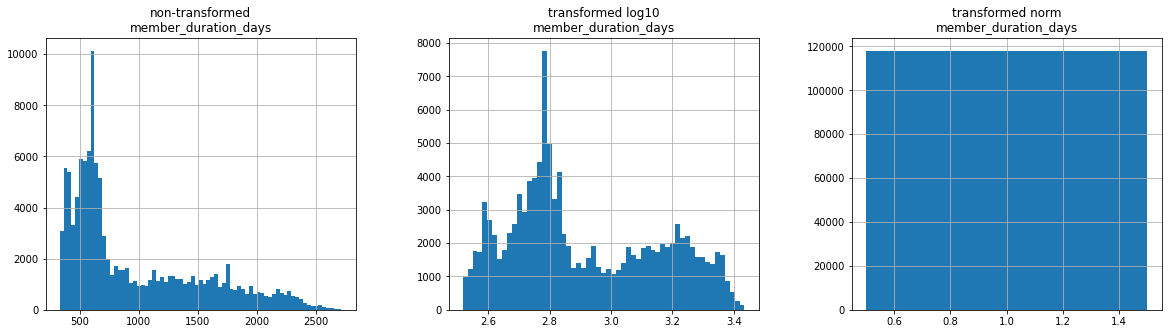

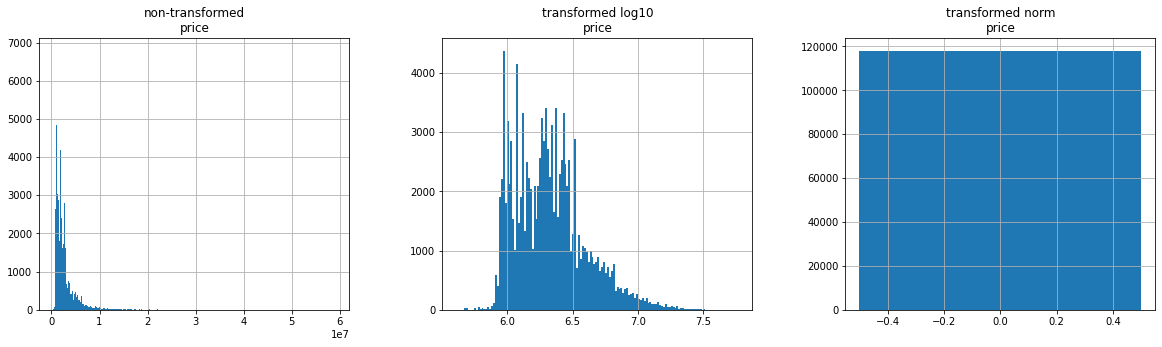

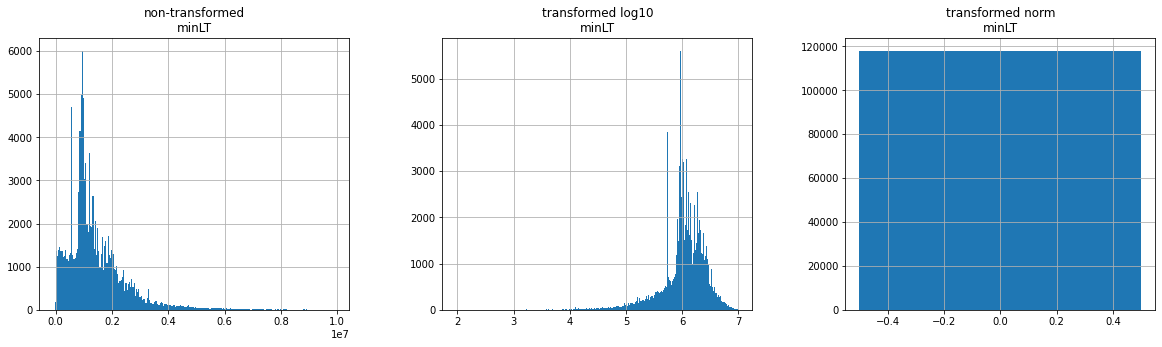

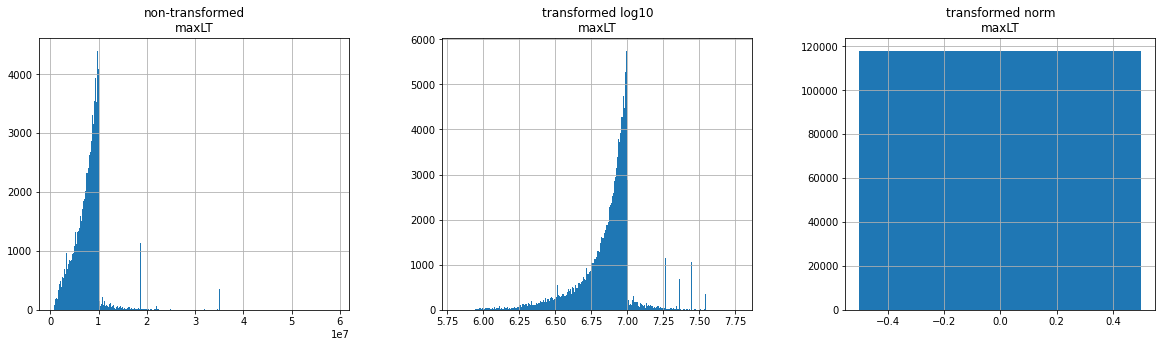

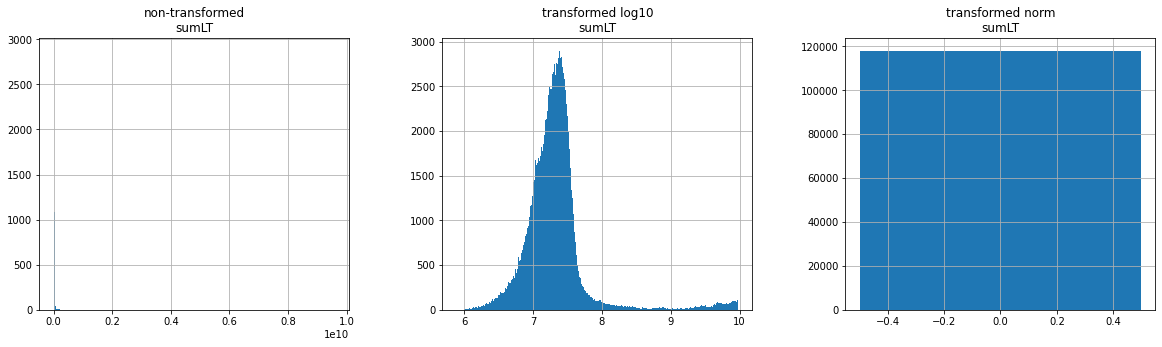

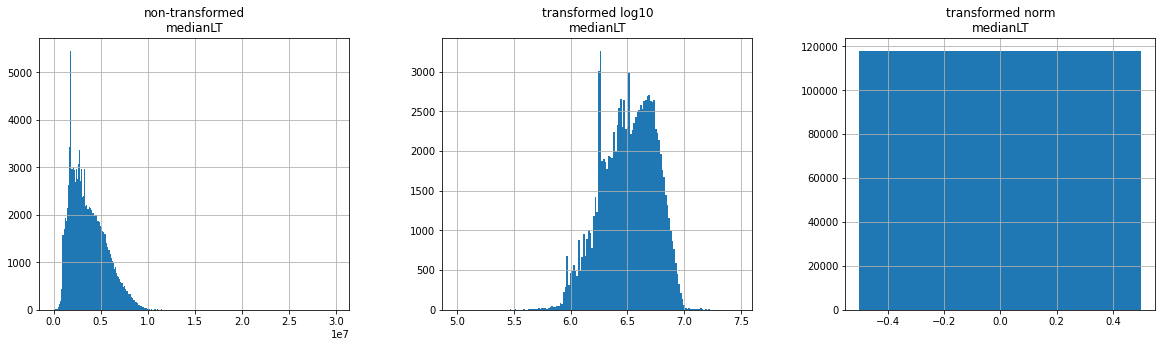

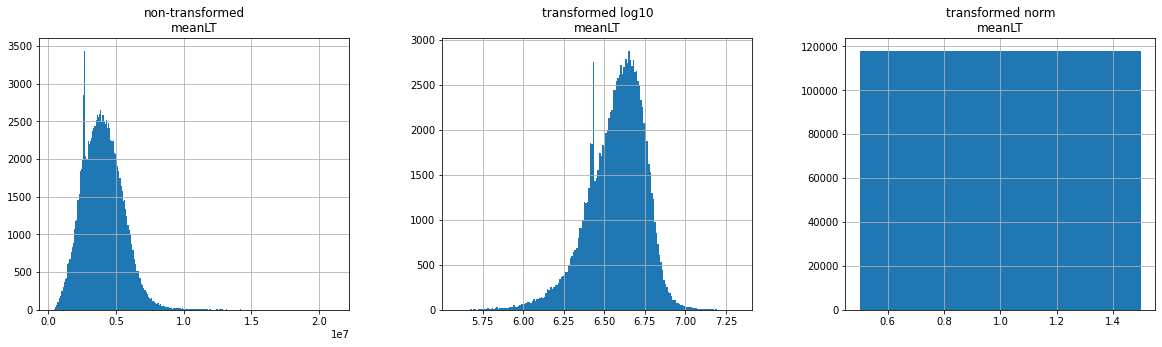

In [ ]:
cont_data = ['member_duration_days','price','minLT','maxLT','sumLT','medianLT','meanLT']
print("Flight")
for i in range(len(cont_data)):
    arr = flight[cont_data[i]].to_numpy()
    norm1 = arr / np.linalg.norm(arr)
    norm2 = preprocessing.normalize(arr[:,np.newaxis],axis=0).ravel()
    temp = pd.DataFrame({'non-transformed\n{}'.format(cont_data[i]):flight[cont_data[i]], \
                         'transformed log10\n{}'.format(cont_data[i]):np.log10(flight[cont_data[i]]),\
                         'transformed norm\n{}'.format(cont_data[i]):np.all(norm1 == norm2),\
                        })
    temp.hist(figsize=(20,5), layout=(1,3), bins='auto')

Test


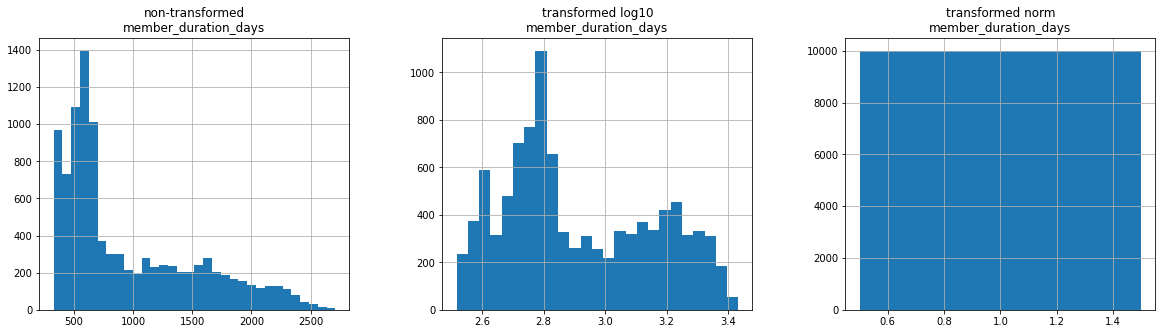

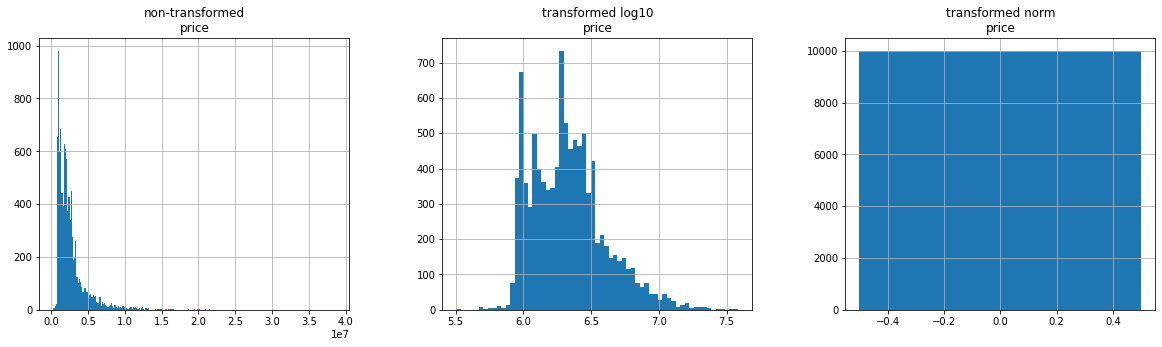

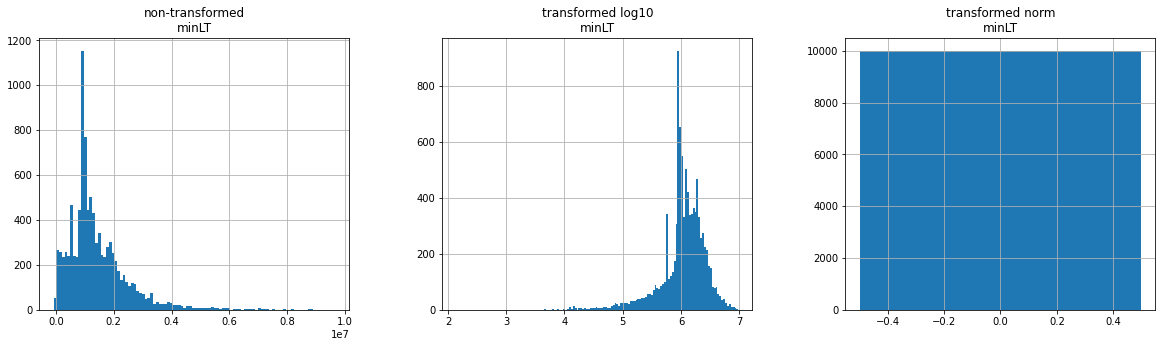

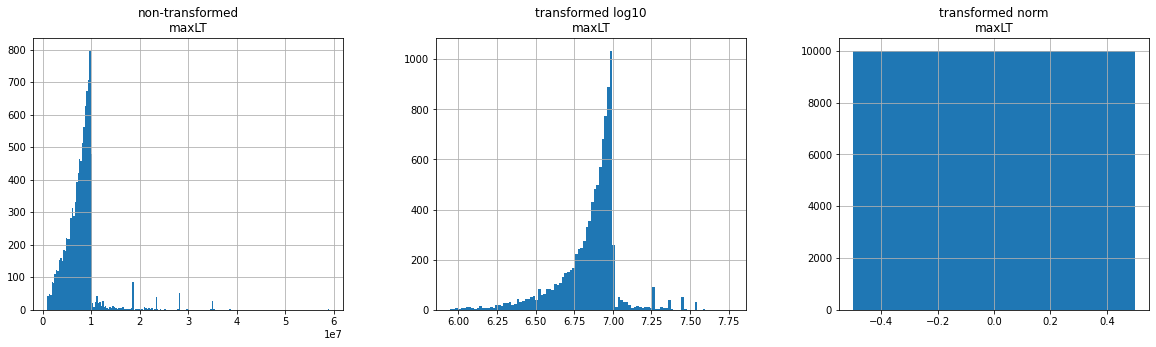

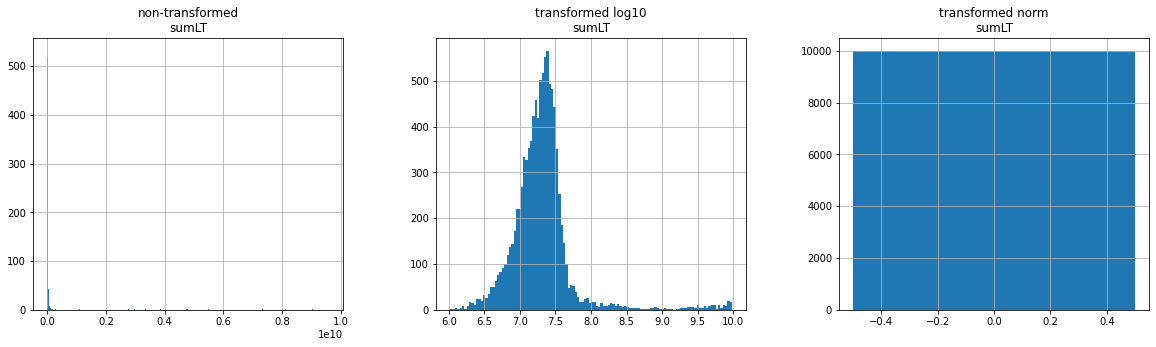

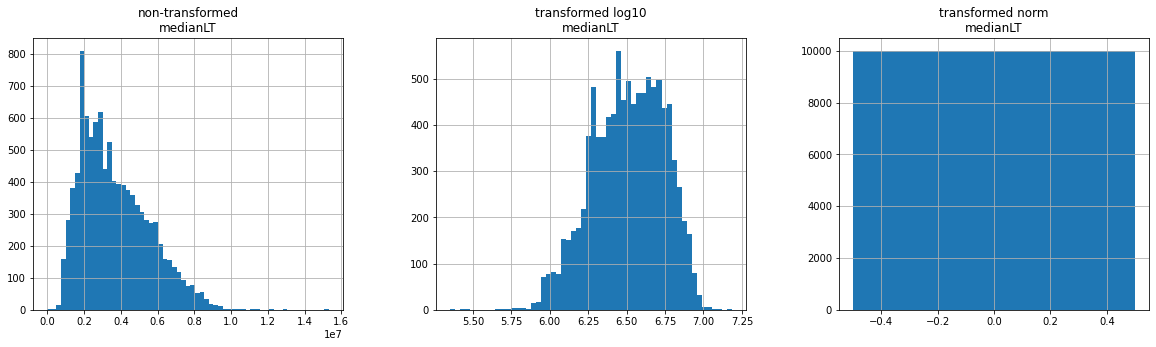

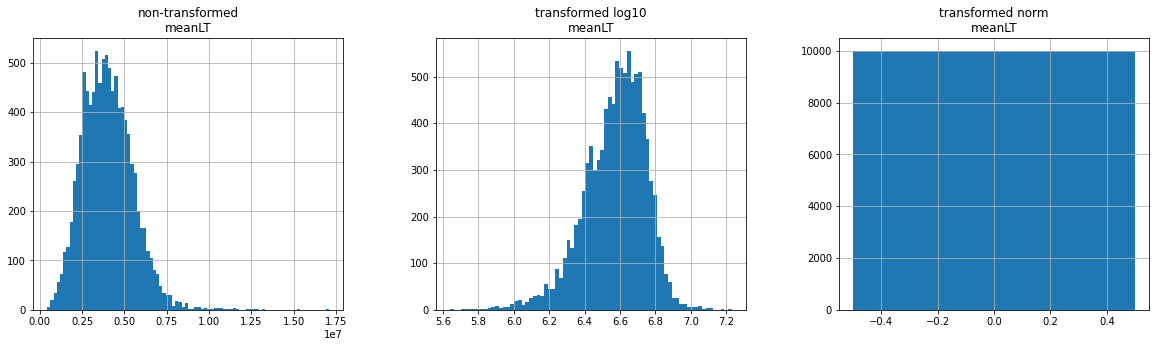

In [ ]:
print("Test")
for i in range(len(cont_data)):
    arr = test[cont_data[i]].to_numpy()
    norm1 = arr / np.linalg.norm(arr)
    norm2 = preprocessing.normalize(arr[:,np.newaxis],axis=0).ravel()
    temp = pd.DataFrame({'non-transformed\n{}'.format(cont_data[i]):test[cont_data[i]], \
                         'transformed log10\n{}'.format(cont_data[i]):np.log10(test[cont_data[i]]),\
                         'transformed norm\n{}'.format(cont_data[i]):np.all(norm1 == norm2),\
                        })
    temp.hist(figsize=(20,5), layout=(1,3), bins='auto')

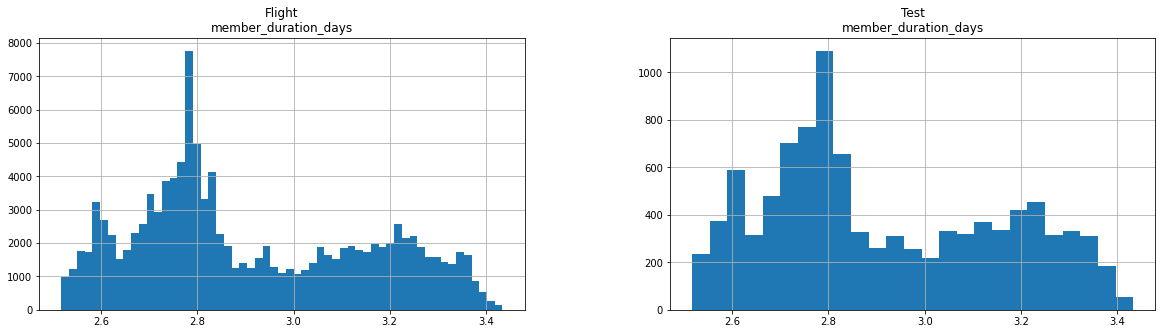

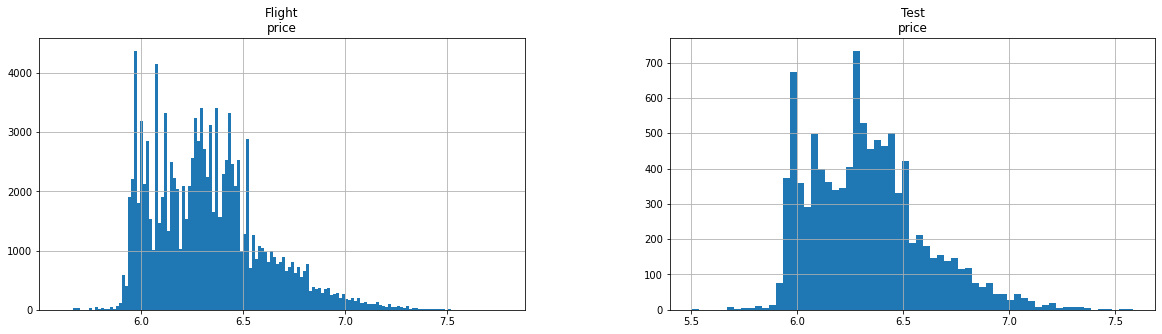

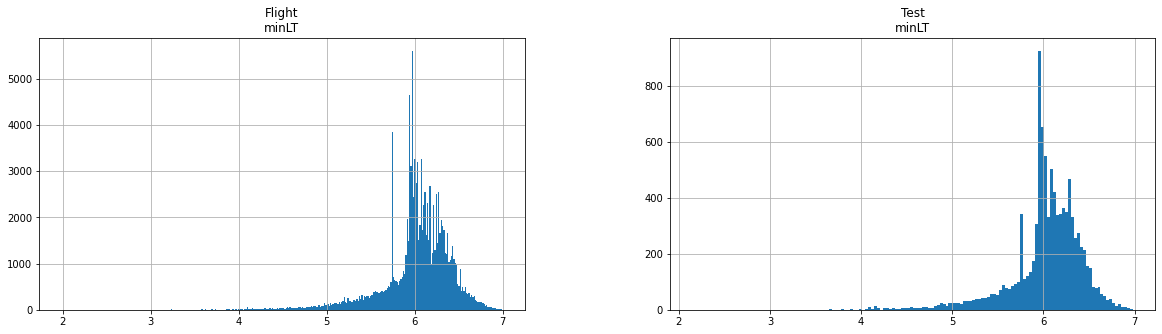

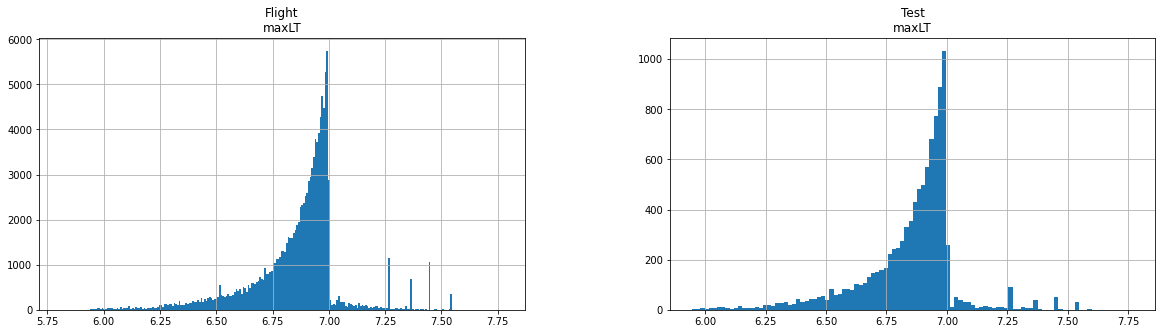

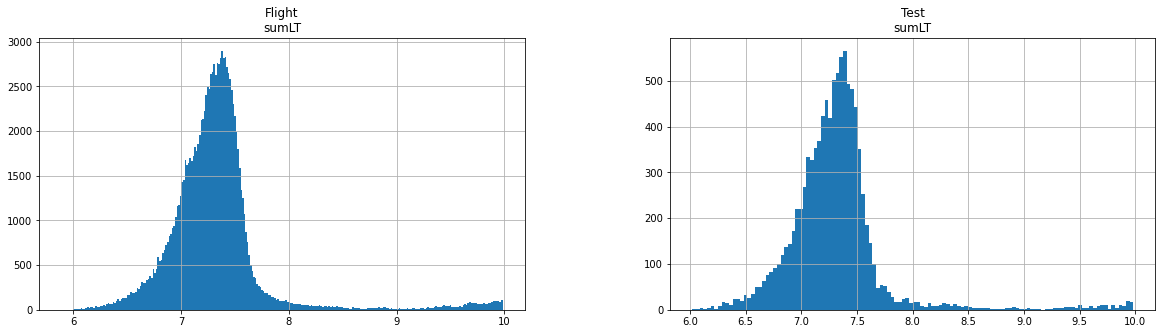

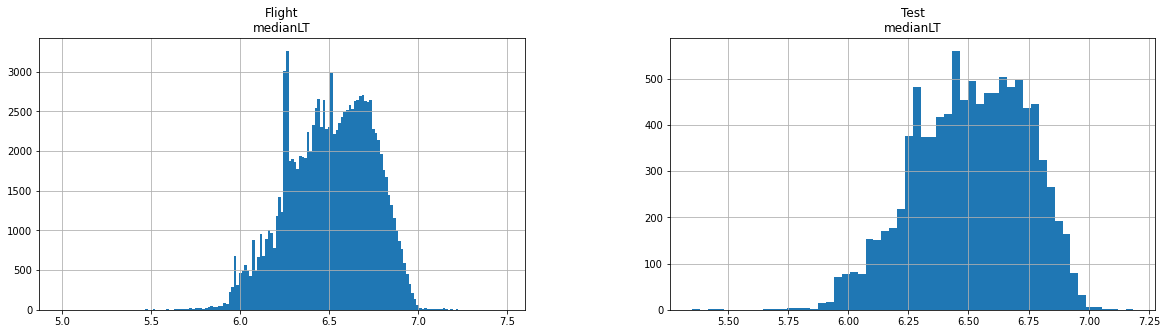

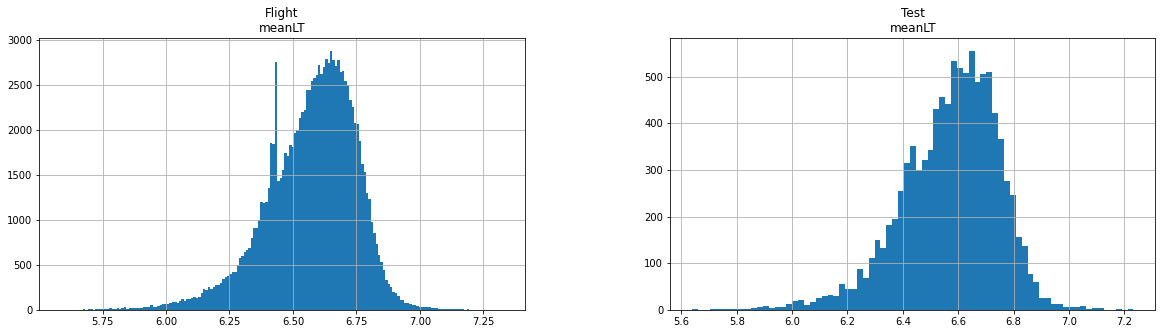

In [ ]:
for i in range(len(cont_data)):
    flight[cont_data[i]] = np.log10(flight[cont_data[i]])
    test[cont_data[i]] = np.log10(test[cont_data[i]])
    temp = pd.DataFrame({'Flight\n{}'.format(cont_data[i]):flight[cont_data[i]], \
                         'Test\n{}'.format(cont_data[i]):test[cont_data[i]]
                        })
    temp.hist(figsize=(20,5), layout=(1,2), bins='auto')

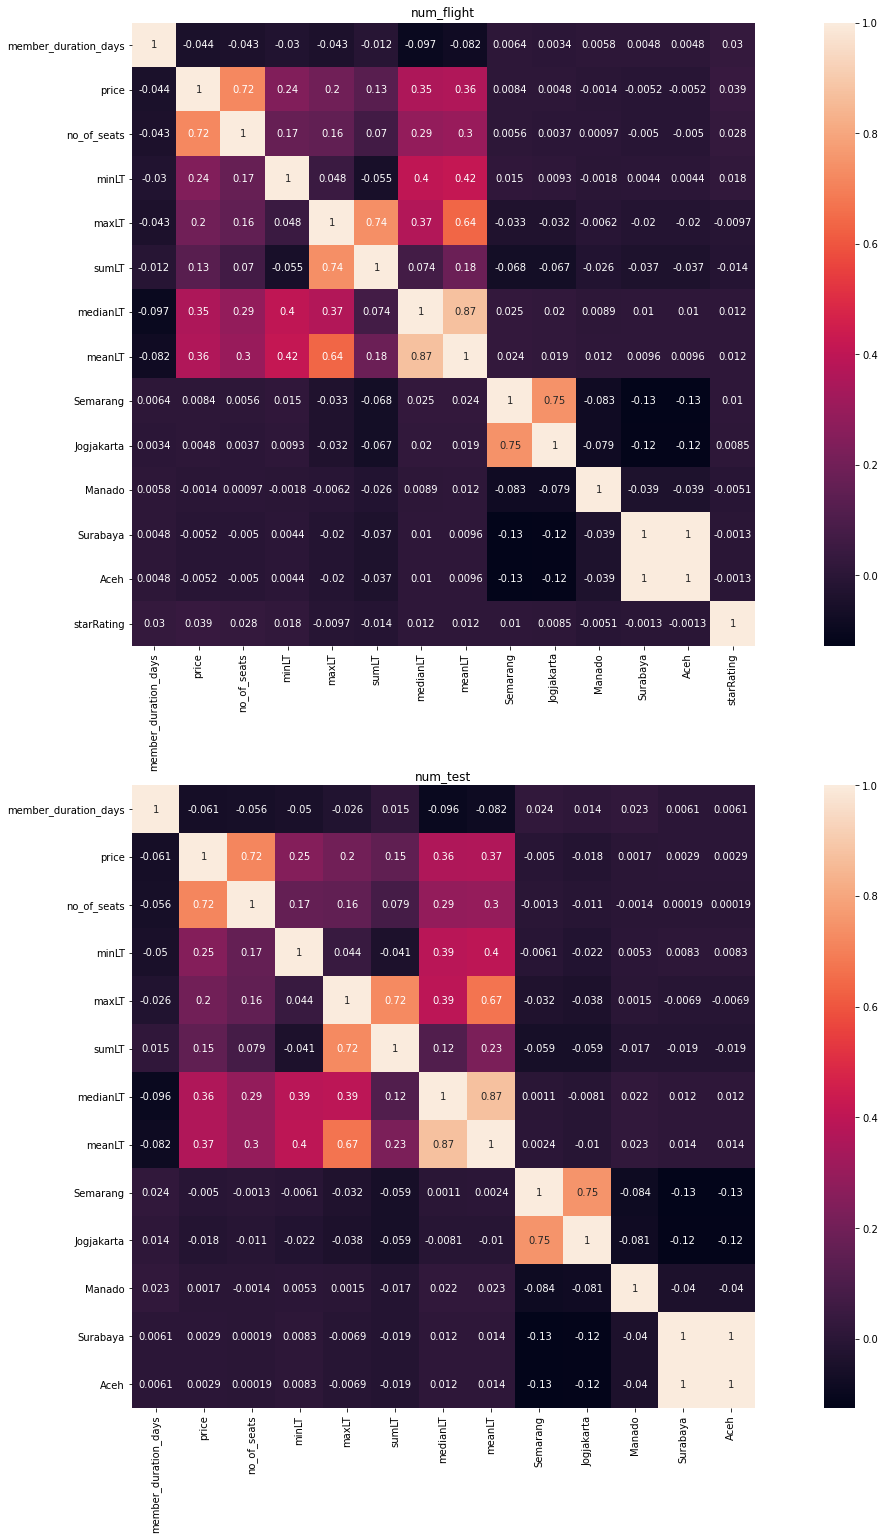

In [ ]:
num_flight = flight.dtypes[flight.dtypes != 'object'].index
num_test = test.dtypes[test.dtypes != 'object'].index

plt.figure(figsize=(20,20))
plt.subplot(211)
plt.tight_layout()
plt.title("num_flight")
sn.heatmap(flight[num_flight].corr(),square=True,annot=True)

plt.subplot(212)
plt.tight_layout()
plt.title("num_test")
sn.heatmap(test[num_test].corr(),square=True,annot=True)

### Generating one-hit encoding to categorical features

In [ ]:
# extract label from training dataset (flight)
# drop hotel_id because it may have collision because the same 4 features
## multi_label_flight = flight.loc[:,'starRating':]
label_flight = flight['hotel_id']
# print(type(label_flight))
# print(type(multi_label_flight))
## display(multi_label_flight.head().transpose())
display(label_flight.head().transpose())
flight = flight.drop(columns='hotel_id')
## flight = flight.drop(columns=['starRating','free_wifi','pool_access','free_breakfast'])

columns = flight.dtypes[flight.dtypes == 'object']
flight = pd.get_dummies(flight, prefix=columns.index)
print("Flight")
display(flight.head().transpose())

order_id
5c6f39c690f23650d3cde28e5b51c908    None
5cbef2b87f51c18bf399d11bfe495a46    None
38fc35a1e62384012a358ab1fbd5ad03    None
c7f54cb748828b4413e02dea2758faf6    None
dec228e4d2b6023c9f1fe9cfe9c451bf    None
Name: hotel_id, dtype: object

Flight


order_id,5c6f39c690f23650d3cde28e5b51c908,5cbef2b87f51c18bf399d11bfe495a46,38fc35a1e62384012a358ab1fbd5ad03,c7f54cb748828b4413e02dea2758faf6,dec228e4d2b6023c9f1fe9cfe9c451bf
member_duration_days,2.752816,2.783189,2.811575,2.621176,2.729974
price,5.947384,6.330363,6.430647,6.059437,6.053475
no_of_seats,1.000000,2.000000,1.000000,1.000000,1.000000
minLT,5.736558,5.744666,6.286313,6.059437,5.978472
maxLT,6.249013,7.271515,6.865042,6.719632,7.132386
sumLT,6.615301,9.458485,7.351165,6.947661,8.835605
medianLT,5.955300,6.248662,6.539307,6.393460,6.557980
meanLT,6.013241,6.422655,6.652195,6.470540,6.639705
Semarang,1.000000,0.000000,1.000000,0.000000,1.000000
Jogjakarta,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
columns = test.dtypes[test.dtypes == 'object']
test = pd.get_dummies(test, prefix=columns.index)
print("Test")
test.head().transpose()

Test


order_id,5ca64fd80a069208e3c0aa05dd580fb8,aca60904549a8a5958fe7a642efcb534,1771011e3adec5db9f30d15b3d439711,6fc1b7d590c2a8c539ce56397403194d,c1f4712f60cd758e773555690d148764
member_duration_days,3.244030,3.035029,3.376212,2.760422,2.935507
price,6.497400,6.335780,6.093287,6.297555,6.475762
no_of_seats,3.000000,2.000000,1.000000,2.000000,1.000000
minLT,5.389669,6.335780,5.397015,4.770404,6.475762
maxLT,6.899286,6.996352,6.889738,6.787959,6.984695
sumLT,7.276664,7.383545,7.265199,6.912755,7.280164
medianLT,6.289169,6.781827,6.412170,6.297555,6.807362
meanLT,6.498513,6.781485,6.487047,6.435634,6.803042
Semarang,0.000000,0.000000,0.000000,1.000000,0.000000
Jogjakarta,0.000000,0.000000,0.000000,1.000000,0.000000


In [ ]:
plus = pd.DataFrame(np.array([[0 for _ in range(2)] for _ in range(len(test))]),\
                    index=test.index,columns=['airlines_name_6872b49542519aea7ae146e23fab5c08',\
                                              'airlines_name_9855a1d3de1c46526dde37c5d6fb758c'])
test = pd.concat((test,plus),axis = 1)
test.shape

(10000, 29)

### Normalize features

In [ ]:
display(flight.describe())
display(test.describe())

,member_duration_days,price,no_of_seats,minLT,maxLT,sumLT,medianLT,meanLT,Semarang,Jogjakarta,Manado,Surabaya,Aceh,starRating,gender_F,gender_M,trip_round,trip_trip,service_class_BUSINESS,service_class_ECONOMY,is_tx_promo_NO,is_tx_promo_YES,airlines_name_0a102015e48c1f68e121acc99fca9a05,airlines_name_33199710eb822fbcfd0dc793f4788d30,airlines_name_6872b49542519aea7ae146e23fab5c08,airlines_name_6c483c0812c96f8ec43bb0ff76eaf716,airlines_name_74c5549aa99d55280a896ea50068a211,airlines_name_9855a1d3de1c46526dde37c5d6fb758c,airlines_name_ad5bef60d81ea077018f4d50b813153a,airlines_name_e35de6a36d385711a660c72c0286154a,free_wifi_NO,free_wifi_YES,pool_access_NO,pool_access_YES,free_breakfast_NO,free_breakfast_YES
count,117946.000000,117946.000000,117946.000000,117859.000000,117946.000000,117946.000000,117943.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000
mean,2.911354,6.325731,1.688595,6.018961,6.859093,7.323655,6.505895,6.572161,0.213021,0.198489,0.024808,0.056577,0.056577,0.202525,0.482305,0.517695,0.159378,0.840622,0.002382,0.997618,0.573322,0.426678,0.177437,0.259780,0.000017,0.310897,0.091152,0.000051,0.100809,0.059858,0.942915,0.057085,0.999847,0.000153,0.989699,0.010301
std,0.239935,0.273066,1.133721,0.403187,0.202613,0.490894,0.235664,0.175881,0.409444,0.398864,0.155540,0.231033,0.231033,0.842818,0.499689,0.499689,0.366030,0.366030,0.048752,0.048752,0.494597,0.494597,0.382040,0.438516,0.004118,0.462862,0.287826,0.007132,0.301077,0.237224,0.232007,0.232007,0.012353,0.012353,0.100972,0.100972
min,2.517196,5.609543,1.000000,1.983807,5.811992,5.890538,4.995507,5.588088,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.729974,6.108128,1.000000,5.916644,6.785610,7.091375,6.331449,6.464328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.831230,6.298211,1.000000,6.053053,6.905692,7.296325,6.519042,6.594618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,3.127429,6.473399,2.000000,6.267895,6.968403,7.454979,6.692025,6.696873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,3.434569,7.771120,11.000000,6.997037,7.771120,9.982807,7.475418,7.326301,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,member_duration_days,price,no_of_seats,minLT,maxLT,sumLT,medianLT,meanLT,Semarang,Jogjakarta,Manado,Surabaya,Aceh,gender_F,gender_M,trip_round,trip_trip,service_class_BUSINESS,service_class_ECONOMY,is_tx_promo_NO,is_tx_promo_YES,airlines_name_0a102015e48c1f68e121acc99fca9a05,airlines_name_33199710eb822fbcfd0dc793f4788d30,airlines_name_6c483c0812c96f8ec43bb0ff76eaf716,airlines_name_74c5549aa99d55280a896ea50068a211,airlines_name_ad5bef60d81ea077018f4d50b813153a,airlines_name_e35de6a36d385711a660c72c0286154a,airlines_name_6872b49542519aea7ae146e23fab5c08,airlines_name_9855a1d3de1c46526dde37c5d6fb758c
count,10000.000000,10000.000000,10000.000000,9993.000000,10000.000000,10000.000000,9999.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.0
mean,2.912806,6.329625,1.692800,6.023185,6.853110,7.307434,6.507512,6.572028,0.210700,0.197400,0.025900,0.055500,0.055500,0.485300,0.514700,0.160100,0.839900,0.003000,0.997000,0.532600,0.467400,0.175900,0.245200,0.31470,0.090300,0.111500,0.062400,0.0,0.0
std,0.241520,0.271099,1.111374,0.402617,0.198787,0.451228,0.231744,0.174261,0.407826,0.398057,0.158845,0.228965,0.228965,0.499809,0.499809,0.366717,0.366717,0.054693,0.054693,0.498961,0.498961,0.380754,0.430227,0.46442,0.286625,0.314766,0.241893,0.0,0.0
min,2.517196,5.505954,1.000000,2.146779,5.946471,6.019826,5.352023,5.639889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0
25%,2.728354,6.115560,1.000000,5.918440,6.780014,7.091573,6.337803,6.465854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0
50%,2.833784,6.305335,1.000000,6.058365,6.902485,7.294299,6.518166,6.593092,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0
75%,3.129690,6.475492,2.000000,6.270698,6.966190,7.449749,6.691439,6.695790,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.0,0.0
max,3.432969,7.586082,10.000000,6.984928,7.771120,9.982221,7.185446,7.232695,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.0,0.0


In [ ]:
flight.isna().sum()

member_duration_days                               0
price                                              0
no_of_seats                                        0
minLT                                             87
maxLT                                              0
sumLT                                              0
medianLT                                           3
meanLT                                             0
Semarang                                           0
Jogjakarta                                         0
Manado                                             0
Surabaya                                           0
Aceh                                               0
starRating                                         0
gender_F                                           0
gender_M                                           0
trip_round                                         0
trip_trip                                          0
service_class_BUSINESS                        

In [ ]:
test.isna().sum()

member_duration_days                              0
price                                             0
no_of_seats                                       0
minLT                                             7
maxLT                                             0
sumLT                                             0
medianLT                                          1
meanLT                                            0
Semarang                                          0
Jogjakarta                                        0
Manado                                            0
Surabaya                                          0
Aceh                                              0
gender_F                                          0
gender_M                                          0
trip_round                                        0
trip_trip                                         0
service_class_BUSINESS                            0
service_class_ECONOMY                             0
is_tx_promo_

In [ ]:
# interval skewed pake median
flight['minLT'].fillna(value=flight['minLT'].median(),inplace=True)
flight['medianLT'].fillna(value=flight['minLT'].median(),inplace=True)

flight.isna().sum()

member_duration_days                              0
price                                             0
no_of_seats                                       0
minLT                                             0
maxLT                                             0
sumLT                                             0
medianLT                                          0
meanLT                                            0
Semarang                                          0
Jogjakarta                                        0
Manado                                            0
Surabaya                                          0
Aceh                                              0
starRating                                        0
gender_F                                          0
gender_M                                          0
trip_round                                        0
trip_trip                                         0
service_class_BUSINESS                            0
service_clas

In [ ]:
# interval skewed pake median
test['minLT'].fillna(flight['minLT'].median(),inplace=True)
test['medianLT'].fillna(flight['minLT'].median(),inplace=True)

test.isna().sum()

member_duration_days                              0
price                                             0
no_of_seats                                       0
minLT                                             0
maxLT                                             0
sumLT                                             0
medianLT                                          0
meanLT                                            0
Semarang                                          0
Jogjakarta                                        0
Manado                                            0
Surabaya                                          0
Aceh                                              0
gender_F                                          0
gender_M                                          0
trip_round                                        0
trip_trip                                         0
service_class_BUSINESS                            0
service_class_ECONOMY                             0
is_tx_promo_

In [ ]:
# a = preprocessing.normalize(a)

In [ ]:
# flight['hotel_id'].str.contains(r'None').value_counts()

# Modelling

In [ ]:
# label_flight.replace('None', 'no')
# label_flight.replace(regex = r'^(.*no).*$', value='yes')
label_flight[label_flight == 'None'] = 'no'
label_flight[label_flight != 'no'] = 'yes'
label_flight.value_counts()

no     111198
yes      6748
Name: hotel_id, dtype: int64

In [ ]:
# define the dictionary of models, where the key
# to the dictionary is the name of the model
# and the value is the model itself
# models = {
#     "knn": KNeighborsClassifier(n_neighbors=1),
#     ## "naive_bayes": GaussianNB(),
#     "logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
#     "decision_tree": DecisionTreeClassifier(),
#     "random_forest": RandomForestClassifier(n_estimators=100),
#     "gradient_boosting" : GradientBoostingClassifier(),
#     "mlp": MLPClassifier(),
#     "svm": SVC(kernel="rbf", gamma="auto")
# }

In [ ]:
indexTest = test.index
label = label_flight.unique()

In [ ]:
type(label[1])

str

In [ ]:
label[1]

'yes'

In [ ]:
# def submissionFormat(pred):
#     print(pred)
#     df = pd.DataFrame(indexTest)
# #     display(df)
#     df = pd.concat((df,pd.DataFrame(pred)),axis = 1)
#     df.columns = ['order_id','is_cross_sell']
# #     df[1].replace('None','no')
# #     df[1].replace(regex = r'^(?!None)', value = 'yes')
# #     display(df)
#     return df
    
# def checkHotel(pred):
#     result = np.full(len(pred),'no', dtype='<U3')
#     for counter in range(len(pred)):
#         if(pred[counter][0] == '0.0' and pred[counter][1] == 'NO' and pred[counter][2] == 'NO' and pred[counter][3] == 'NO'):
#             continue
#         else:
#             for hid in hotel.index:
#                 if(hotel.loc[hid][0] == pred[counter][0] and hotel.loc[hid][1] == pred[counter][1] \
#                    and hotel.loc[hid][2] == pred[counter][2] and hotel.loc[hid][3] == pred[counter][3]):
#                     result[counter] = 'yes'
#                     break
#     return result
    
# def learning_model(m,trainX,trainY,testX,*args):
#     # train the model
#     print("[INFO] using model" , m)
#     model = models[m]
#     model.fit(trainX, trainY)
#     # multi_target = MultiOutputClassifier(model)
#     # multi_target.fit(trainX, trainY)
#     # multi_label = multi_target.predict(testX)
    
#     # make predictions on our data and show a classification report
#     print("[INFO] evaluating...")
#     predictions = model.predict(testX)
#     # predictions = checkHotel(multi_label)
#     if(len(args) == 0):
#         result = submissionFormat(predictions)
#         result.to_csv(path_or_buf="submission{}.csv".format(m),index=False)
#     else:
#         # report = classification_report(args[0], predictions, target_names=label)
#         report = precision_recall_fscore_support(args[0], predictions, average='micro')
#         report2 = precision_recall_fscore_support(args[0], predictions, average='macro')
# #         print(report)
#         # return report
#         return report, report2

In [ ]:
# smt = SMOTE()
# flight, label_flight = smt.fit_sample(flight, label_flight)
# len(label_flight)

In [ ]:
# # After SMOTE
# val_y = 0
# val_n = 0
# for i in label_flight:
#   if i == "yes":
#     val_y = val_y + 1
#   elif i == "no":
#     val_n = val_n + 1
# print("Yes",val_y)
# print("No",val_n)

In [ ]:
display(flight.describe(include='all'))
display(label_flight.describe(include='all'))
# display(multi_label_flight.describe(include='all'))

,member_duration_days,price,no_of_seats,minLT,maxLT,sumLT,medianLT,meanLT,Semarang,Jogjakarta,Manado,Surabaya,Aceh,starRating,gender_F,gender_M,trip_round,trip_trip,service_class_BUSINESS,service_class_ECONOMY,is_tx_promo_NO,is_tx_promo_YES,airlines_name_0a102015e48c1f68e121acc99fca9a05,airlines_name_33199710eb822fbcfd0dc793f4788d30,airlines_name_6872b49542519aea7ae146e23fab5c08,airlines_name_6c483c0812c96f8ec43bb0ff76eaf716,airlines_name_74c5549aa99d55280a896ea50068a211,airlines_name_9855a1d3de1c46526dde37c5d6fb758c,airlines_name_ad5bef60d81ea077018f4d50b813153a,airlines_name_e35de6a36d385711a660c72c0286154a,free_wifi_NO,free_wifi_YES,pool_access_NO,pool_access_YES,free_breakfast_NO,free_breakfast_YES
count,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000,117946.000000
mean,2.911354,6.325731,1.688595,6.018986,6.859093,7.323655,6.505883,6.572161,0.213021,0.198489,0.024808,0.056577,0.056577,0.202525,0.482305,0.517695,0.159378,0.840622,0.002382,0.997618,0.573322,0.426678,0.177437,0.259780,0.000017,0.310897,0.091152,0.000051,0.100809,0.059858,0.942915,0.057085,0.999847,0.000153,0.989699,0.010301
std,0.239935,0.273066,1.133721,0.403039,0.202613,0.490894,0.235672,0.175881,0.409444,0.398864,0.155540,0.231033,0.231033,0.842818,0.499689,0.499689,0.366030,0.366030,0.048752,0.048752,0.494597,0.494597,0.382040,0.438516,0.004118,0.462862,0.287826,0.007132,0.301077,0.237224,0.232007,0.232007,0.012353,0.012353,0.100972,0.100972
min,2.517196,5.609543,1.000000,1.983807,5.811992,5.890538,4.995507,5.588088,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.729974,6.108128,1.000000,5.916644,6.785610,7.091375,6.331444,6.464328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.831230,6.298211,1.000000,6.053053,6.905692,7.296325,6.519040,6.594618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,3.127429,6.473399,2.000000,6.267499,6.968403,7.454979,6.692017,6.696873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,3.434569,7.771120,11.000000,6.997037,7.771120,9.982807,7.475418,7.326301,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


count     117946
unique         2
top           no
freq      111198
Name: hotel_id, dtype: object

In [ ]:
hotel['starRating'].value_counts()

4.0    880
3.0    854
2.0    515
1.0    321
5.0    286
0.0    106
Name: starRating, dtype: int64

In [ ]:
hotel['starRating'] = hotel.starRating.astype(str)

In [ ]:
hotel['starRating'].value_counts()

4.0    880
3.0    854
2.0    515
1.0    321
5.0    286
0.0    106
Name: starRating, dtype: int64

In [ ]:
type(hotel['starRating'][0])

str

In [ ]:
# hotel['starRating'][0] + hotel['starRating'][22]

In [ ]:
# multi_label_flight['starRating'][0].astype(str)

In [ ]:
# multi_label_flight['starRating'].value_counts()

In [ ]:
# multi_label_flight

In [ ]:
flight = flight.to_numpy()
label_flight = label_flight.to_numpy()
# multi_label_flight['starRating'] = multi_label_flight.starRating.astype(str)
# multi_label_flight = multi_label_flight.to_numpy()

display(flight)
display(label_flight)
# display(multi_label_flight)

array([[2.75281643, 5.94738372, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [2.78318869, 6.33036329, 2.        , ..., 0.        , 1.        ,
        0.        ],
       [2.81157501, 6.43064739, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [3.01452054, 6.03542173, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [3.11092624, 6.69160057, 3.        , ..., 0.        , 1.        ,
        0.        ],
       [3.20167018, 6.70151963, 4.        , ..., 0.        , 1.        ,
        0.        ]])

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
trainX, testX, trainY, testY = train_test_split(flight, label_flight, test_size = 0.078157972894815, random_state=0)
display(len(trainX))
display(len(trainY))
display(len(testX))
display(len(testY))

108727

108727

9219

9219

In [ ]:
# scaler = preprocessing.StandardScaler()
# scaler.fit(flight)
# flight = scaler.transform(flight)
# test = scaler.transform(test)

# scaler = preprocessing.StandardScaler()
# scaler.fit(trainX)
# trainX = scaler.transform(trainX)
# testX = scaler.transform(testX)

In [ ]:
# pca = PCA(.95)
# pca.fit(flight)
# flight = pca.transform(flight)
# test = pca.transform(test)

# pca = PCA(.95)
# pca.fit(trainX)
# trainX = pca.transform(trainX)
# testX = pca.transform(testX)

# Validation

In [ ]:
label_flight

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
df = pd.DataFrame(label_flight)
df

,0
0,no
1,no
2,no
3,no
4,no
...,...
117941,no
117942,no
117943,no
117944,no


In [ ]:
df.value_counts()
# for row in data_top.index: 
#     print(row, end = " ") 

no     111198
yes      6748
dtype: int64

In [ ]:
# type(multi_label_flight[0][1])

In [ ]:
# multi_label_flight

In [ ]:
test
# test = test.to_numpy()

,member_duration_days,price,no_of_seats,minLT,maxLT,sumLT,medianLT,meanLT,Semarang,Jogjakarta,Manado,Surabaya,Aceh,gender_F,gender_M,trip_round,trip_trip,service_class_BUSINESS,service_class_ECONOMY,is_tx_promo_NO,is_tx_promo_YES,airlines_name_0a102015e48c1f68e121acc99fca9a05,airlines_name_33199710eb822fbcfd0dc793f4788d30,airlines_name_6c483c0812c96f8ec43bb0ff76eaf716,airlines_name_74c5549aa99d55280a896ea50068a211,airlines_name_ad5bef60d81ea077018f4d50b813153a,airlines_name_e35de6a36d385711a660c72c0286154a,airlines_name_6872b49542519aea7ae146e23fab5c08,airlines_name_9855a1d3de1c46526dde37c5d6fb758c
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5ca64fd80a069208e3c0aa05dd580fb8,3.244030,6.497400,3,5.389669,6.899286,7.276664,6.289169,6.498513,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0
aca60904549a8a5958fe7a642efcb534,3.035029,6.335780,2,6.335780,6.996352,7.383545,6.781827,6.781485,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0
1771011e3adec5db9f30d15b3d439711,3.376212,6.093287,1,5.397015,6.889738,7.265199,6.412170,6.487047,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0
6fc1b7d590c2a8c539ce56397403194d,2.760422,6.297555,2,4.770404,6.787959,6.912755,6.297555,6.435634,1.0,1.0,0.0,0.0,0.0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0
c1f4712f60cd758e773555690d148764,2.935507,6.475762,1,6.475762,6.984695,7.280164,6.807362,6.803042,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a3a06ed271bd87f0e987be26f8f200f8,2.706718,6.716578,3,6.716578,6.845885,7.451476,6.729761,6.752506,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0
2d4ba920b453a22e079c0888acea9bba,3.331630,6.523674,2,6.284868,6.966000,7.662567,6.662904,6.708324,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0
f22e17eebf2b7305906161b517391aef,3.238548,6.023322,1,5.939947,6.781724,7.254080,6.353224,6.475928,1.0,1.0,0.0,0.0,0.0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0


In [ ]:
# trainX, testX, _, testY = train_test_split(flight, label_flight, test_size = 0.078157972894815, random_state=0)
# multi_trainY, _, _, _ = train_test_split(multi_label_flight, label_flight, test_size = 0.078157972894815, random_state=0)
# display(trainX)
# display(multi_trainY)

BEFORE SMOTE

In [ ]:
# %%time

# # for m in models:
# #     learning_model(m,flight,label_flight,test)
# # TEST TRAIN SPLIT
# # trainX, testX, _, testY = train_test_split(flight, label_flight, test_size = 0.078157972894815, random_state=0)
# # multi_trainY, _, _, _ = train_test_split(multi_label_flight, label_flight, test_size = 0.078157972894815, random_state=0)
# for m in models:
#     skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
#     precisions = np.zeros((2,3))
#     recalls = np.zeros((2,3))
#     f1_scores = np.zeros((2,3))
#     accuracies = np.zeros(3)
#     # micro = np.zeros((3,4))
#     # macro = np.zeros((3,4))
#     counter = 0
#     for train_index, test_index in skf.split(flight, label_flight):
#         print("TRAIN:", train_index, "\nTEST:", test_index)
#         trainX, testX, trainY, testY = flight[train_index], flight[test_index], label_flight[train_index], label_flight[test_index]
#         # print("KFolding #{}".format(counter + 1))
#         # trainX, testX, testY = flight[train_index], flight[test_index], label_flight[test_index]
#         # multi_trainY = multi_label_flight[train_index]
#         report = learning_model(m,trainX,trainY,testX,testY)
#         # report = learning_model(m,trainX,multi_trainY,testX,testY)
#         # micro[counter] = report[0]
#         # macro[counter] = report[1]
          
# #         no label
#         precisions[0][counter] = float(report[74:78]) #no_precision
#         recalls[0][counter] = float(report[84:88]) #no_recall
#         f1_scores[0][counter] = float(report[94:98]) #no_f1_score
# #         yes label
#         precisions[1][counter] = float(report[128:132]) #yes_precision
#         recalls[1][counter] = float(report[138:142]) #yes_recall
#         f1_scores[1][counter] = float(report[148:152]) #yes_f1_score
#         accuracies[counter] = float(report[203:207]) #accuracy_val
#         counter += 1

#     # print("Micro")
#     # print("mean prediction:\t{}".format(micro.T[0].mean()))
#     # print("mean recall:\t\t{}".format(micro.T[1].mean()))    
#     # print("mean f1-score:\t\t{}".format(micro.T[2].mean()))   
#     # print("Macro")
#     # print("mean prediction:\t{}".format(macro.T[0].mean()))
#     # print("mean recall:\t\t{}".format(macro.T[1].mean()))    
#     # print("mean f1-score:\t\t{}\n".format(macro.T[2].mean()))   
#     print("label ",label[0])
#     print("mean prediction:\t{}".format(precisions[0].mean()))
#     print("mean recall:\t\t{}".format(recalls[0].mean()))    
#     print("mean f1-score:\t\t{}".format(f1_scores[0].mean()))    
#     print("label ",label[1])
#     print("mean prediction:\t{}".format(precisions[1].mean()))
#     print("mean recall:\t\t{}".format(recalls[1].mean()))    
#     print("mean f1-score:\t\t{}".format(f1_scores[1].mean()))
#     print("\n")    
#     print("mean accuracy:\t\t{}".format(accuracies.mean()))
#     print("mean of all f1-score:\t{}\n".format((f1_scores[0].mean() + f1_scores[1].mean()) /2))

CEK SHAPE

In [ ]:
# # Before SMOTE
val_y = 0
val_n = 0
for i in label_flight:
  if i == "yes":
    val_y = val_y + 1
  elif i == "no":
    val_n = val_n + 1
print("Yes",val_y)
print("No",val_n)

Yes 6748
No 111198




1. K-Nearest Neighbours
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. MLP Classifier
6. Logistic Regression
7. Support Vector Machine


TRAIN: [     1      3      4 ... 117942 117943 117944] TEST: [     0      2      6 ... 117937 117940 117945]
TRAIN: [     0      2      3 ... 117943 117944 117945] TEST: [     1      4     12 ... 117930 117936 117942]
TRAIN: [     0      1      2 ... 117940 117942 117945] TEST: [     3      5      8 ... 117941 117943 117944]

Akurasi Rata-rata Testing KNN: 0.9998982583094222

Micro
mean prediction:	0.9998982583094222
mean recall:		0.9998982583094222
mean f1-score:		0.9998982583094222

Macro
mean prediction:	0.9999460537895226
mean recall:		0.9991090829747197
mean f1-score:		0.9995271513339851


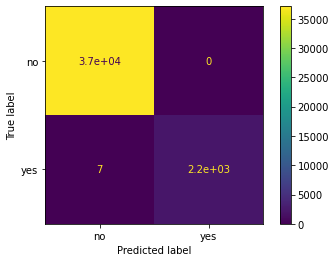

In [ ]:
# 1. KNN
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state=None, shuffle=True)

acc_knn = np.zeros(3)
micro = np.zeros((3,4))
macro = np.zeros((3,4))
counter = 0

for train_index, test_index in kf.split(flight, label_flight):
  print("TRAIN:", train_index, "TEST:", test_index)
  trainX, testX, trainY, testY = flight[train_index], flight[test_index], label_flight[train_index], label_flight[test_index]
  
  knn = KNeighborsClassifier(n_neighbors=1)
  knn.fit(trainX,trainY) 
  prediksi_knn = knn.predict(testX)
  acc_knn[counter] = accuracy_score(testY, prediksi_knn)

  micro[counter] = precision_recall_fscore_support(testY, prediksi_knn, average='micro')
  macro[counter] = precision_recall_fscore_support(testY, prediksi_knn, average='macro')

  counter += 1

print('\nAkurasi Rata-rata Testing KNN:', acc_knn.mean())

print("\nMicro")
print("mean prediction:\t{}".format(micro.T[0].mean()))
print("mean recall:\t\t{}".format(micro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(micro.T[2].mean())) 

print("\nMacro")
print("mean prediction:\t{}".format(macro.T[0].mean()))
print("mean recall:\t\t{}".format(macro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(macro.T[2].mean())) 

plot_confusion_matrix(knn, testX.round(), testY)

TRAIN: [     2      6      7 ... 117940 117944 117945] TEST: [     0      1      3 ... 117941 117942 117943]
TRAIN: [     0      1      3 ... 117942 117943 117944] TEST: [     2      8     14 ... 117938 117940 117945]
TRAIN: [     0      1      2 ... 117942 117943 117945] TEST: [     6      7      9 ... 117933 117937 117944]

Akurasi Rata-rata Testing DT: 1.0

Micro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0

Macro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0


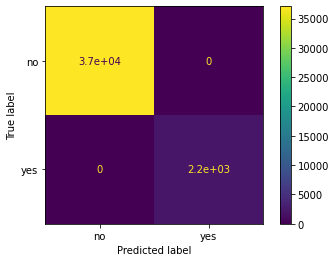

In [ ]:
# 2. Decision Tree
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state=None, shuffle=True)

acc_dt = np.zeros(3)
micro = np.zeros((3,4))
macro = np.zeros((3,4))
counter = 0

for train_index, test_index in kf.split(flight, label_flight):
  print("TRAIN:", train_index, "TEST:", test_index)
  trainX, testX, trainY, testY = flight[train_index], flight[test_index], label_flight[train_index], label_flight[test_index]
  
  dt = DecisionTreeClassifier()
  dt.fit(trainX, trainY)
  prediksi_dt = dt.predict(testX)
  acc_dt[counter] = accuracy_score(testY, prediksi_dt)

  micro[counter] = precision_recall_fscore_support(testY, prediksi_dt, average='micro')
  macro[counter] = precision_recall_fscore_support(testY, prediksi_dt, average='macro')

  counter += 1

print('\nAkurasi Rata-rata Testing DT:', acc_dt.mean())

print("\nMicro")
print("mean prediction:\t{}".format(micro.T[0].mean()))
print("mean recall:\t\t{}".format(micro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(micro.T[2].mean())) 

print("\nMacro")
print("mean prediction:\t{}".format(macro.T[0].mean()))
print("mean recall:\t\t{}".format(macro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(macro.T[2].mean())) 

plot_confusion_matrix(dt, testX.round(), testY)

TRAIN: [     1      2      3 ... 117941 117942 117944] TEST: [     0      4      5 ... 117937 117943 117945]
TRAIN: [     0      3      4 ... 117941 117943 117945] TEST: [     1      2      8 ... 117939 117942 117944]
TRAIN: [     0      1      2 ... 117943 117944 117945] TEST: [     3      6     10 ... 117936 117940 117941]

Akurasi Rata-rata Testing Random Forest: 1.0

Micro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0

Macro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0


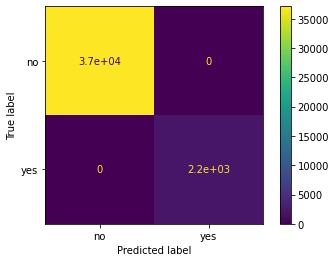

In [ ]:
# 3. Random Forest
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state=None, shuffle=True)

acc_rf = np.zeros(3)
micro = np.zeros((3,4))
macro = np.zeros((3,4))
counter = 0

for train_index, test_index in kf.split(flight, label_flight):
  print("TRAIN:", train_index, "TEST:", test_index)
  trainX, testX, trainY, testY = flight[train_index], flight[test_index], label_flight[train_index], label_flight[test_index]
  
  rf = RandomForestClassifier(n_estimators=100)
  rf.fit(trainX, trainY)
  prediksi_rf = rf.predict(testX)
  acc_rf[counter] = accuracy_score(testY, prediksi_rf)

  micro[counter] = precision_recall_fscore_support(testY, prediksi_rf, average='micro')
  macro[counter] = precision_recall_fscore_support(testY, prediksi_rf, average='macro')

  counter += 1

print('\nAkurasi Rata-rata Testing Random Forest:', acc_rf.mean())

print("\nMicro")
print("mean prediction:\t{}".format(micro.T[0].mean()))
print("mean recall:\t\t{}".format(micro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(micro.T[2].mean())) 

print("\nMacro")
print("mean prediction:\t{}".format(macro.T[0].mean()))
print("mean recall:\t\t{}".format(macro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(macro.T[2].mean())) 

plot_confusion_matrix(rf, testX.round(), testY)

TRAIN: [     1      3      4 ... 117940 117943 117944] TEST: [     0      2      5 ... 117941 117942 117945]
TRAIN: [     0      2      5 ... 117942 117943 117945] TEST: [     1      3      4 ... 117935 117940 117944]
TRAIN: [     0      1      2 ... 117942 117944 117945] TEST: [     7      8     13 ... 117926 117936 117943]

Akurasi Rata-rata Testing Gradient Boosting: 1.0

Micro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0

Macro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0


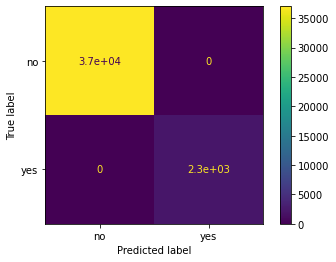

In [ ]:
# 4. Gradient Boosting
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state=None, shuffle=True)

acc_gb = np.zeros(3)
micro = np.zeros((3,4))
macro = np.zeros((3,4))
counter = 0

for train_index, test_index in kf.split(flight, label_flight):
  print("TRAIN:", train_index, "TEST:", test_index)
  trainX, testX, trainY, testY = flight[train_index], flight[test_index], label_flight[train_index], label_flight[test_index]
  
  gb = GradientBoostingClassifier()
  gb.fit(trainX, trainY)
  prediksi_gb = gb.predict(testX)
  acc_gb[counter] = accuracy_score(testY, prediksi_gb)

  micro[counter] = precision_recall_fscore_support(testY, prediksi_gb, average='micro')
  macro[counter] = precision_recall_fscore_support(testY, prediksi_gb, average='macro')

  counter += 1

print('\nAkurasi Rata-rata Testing Gradient Boosting:', acc_gb.mean())

print("\nMicro")
print("mean prediction:\t{}".format(micro.T[0].mean()))
print("mean recall:\t\t{}".format(micro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(micro.T[2].mean())) 

print("\nMacro")
print("mean prediction:\t{}".format(macro.T[0].mean()))
print("mean recall:\t\t{}".format(macro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(macro.T[2].mean())) 

plot_confusion_matrix(gb, testX.round(), testY)

TRAIN: [     0      2      4 ... 117943 117944 117945] TEST: [     1      3      5 ... 117932 117939 117941]
TRAIN: [     0      1      3 ... 117940 117941 117944] TEST: [     2      4      6 ... 117942 117943 117945]
TRAIN: [     1      2      3 ... 117942 117943 117945] TEST: [     0      8      9 ... 117938 117940 117944]

Akurasi Rata-rata Testing MLP: 0.9999915214718724

Micro
mean prediction:	0.9999915214718724
mean recall:		0.9999915214718724
mean f1-score:		0.9999915214718724

Macro
mean prediction:	0.9999955044865224
mean recall:		0.9999256616116563
mean f1-score:		0.9999605747276314


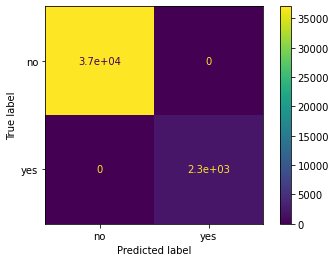

In [ ]:
# 5. MLP
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state=None, shuffle=True)

acc_mlp = np.zeros(3)
micro = np.zeros((3,4))
macro = np.zeros((3,4))
counter = 0

for train_index, test_index in kf.split(flight, label_flight):
  print("TRAIN:", train_index, "TEST:", test_index)
  trainX, testX, trainY, testY = flight[train_index], flight[test_index], label_flight[train_index], label_flight[test_index]
  
  mlp = MLPClassifier(hidden_layer_sizes=(80, ))
  mlp.fit(trainX, trainY)
  prediksi_MLP = mlp.predict(testX)
  acc_mlp[counter] = accuracy_score(testY, prediksi_MLP)

  micro[counter] = precision_recall_fscore_support(testY, prediksi_MLP, average='micro')
  macro[counter] = precision_recall_fscore_support(testY, prediksi_MLP, average='macro')

  counter += 1

print('\nAkurasi Rata-rata Testing MLP:', acc_mlp.mean())

print("\nMicro")
print("mean prediction:\t{}".format(micro.T[0].mean()))
print("mean recall:\t\t{}".format(micro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(micro.T[2].mean())) 

print("\nMacro")
print("mean prediction:\t{}".format(macro.T[0].mean()))
print("mean recall:\t\t{}".format(macro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(macro.T[2].mean())) 

plot_confusion_matrix(mlp, testX.round(), testY)

TRAIN: [     2      3      4 ... 117942 117943 117944] TEST: [     0      1      6 ... 117932 117939 117945]
TRAIN: [     0      1      2 ... 117939 117940 117945] TEST: [     3      7     12 ... 117942 117943 117944]
TRAIN: [     0      1      3 ... 117943 117944 117945] TEST: [     2      4      5 ... 117937 117938 117940]

Akurasi Rata-rata Testing Logistic Regression: 0.9999321726375833

Micro
mean prediction:	0.9999321726375833
mean recall:		0.9999321726375833
mean f1-score:		0.9999321726375833

Macro
mean prediction:	0.999964007448512
mean recall:		0.9994134435910484
mean f1-score:		0.9996885166285022


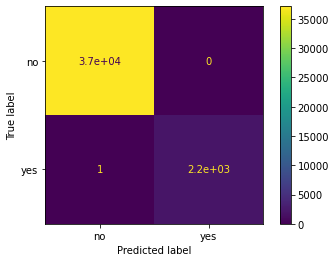

In [ ]:
# 6. Logistic Regression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state=None, shuffle=True)

acc_lr = np.zeros(3)
micro = np.zeros((3,4))
macro = np.zeros((3,4))
counter = 0

for train_index, test_index in kf.split(flight, label_flight):
  print("TRAIN:", train_index, "TEST:", test_index)
  trainX, testX, trainY, testY = flight[train_index], flight[test_index], label_flight[train_index], label_flight[test_index]
  
  lr = LogisticRegression(solver="lbfgs", multi_class="auto")
  lr.fit(trainX, trainY)
  prediksi_lr = lr.predict(testX)
  acc_lr[counter] = accuracy_score(testY, prediksi_lr)

  micro[counter] = precision_recall_fscore_support(testY, prediksi_lr, average='micro')
  macro[counter] = precision_recall_fscore_support(testY, prediksi_lr, average='macro')

  counter += 1

print('\nAkurasi Rata-rata Testing Logistic Regression:', acc_lr.mean())

print("\nMicro")
print("mean prediction:\t{}".format(micro.T[0].mean()))
print("mean recall:\t\t{}".format(micro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(micro.T[2].mean())) 

print("\nMacro")
print("mean prediction:\t{}".format(macro.T[0].mean()))
print("mean recall:\t\t{}".format(macro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(macro.T[2].mean())) 

plot_confusion_matrix(lr, testX.round(), testY)

TRAIN: [     0      1      2 ... 117938 117939 117944] TEST: [     4      5     11 ... 117942 117943 117945]
TRAIN: [     1      4      5 ... 117943 117944 117945] TEST: [     0      2      3 ... 117932 117937 117939]
TRAIN: [     0      2      3 ... 117942 117943 117945] TEST: [     1      7     12 ... 117936 117938 117944]

Akurasi Rata-rata Testing SVM: 1.0

Micro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0

Macro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0


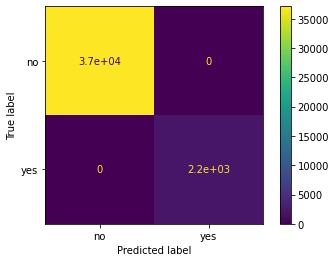

In [ ]:
# 7. SVM
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state=None, shuffle=True)

acc_svm = np.zeros(3)
micro = np.zeros((3,4))
macro = np.zeros((3,4))
counter = 0

for train_index, test_index in kf.split(flight, label_flight):
  print("TRAIN:", train_index, "TEST:", test_index)
  trainX, testX, trainY, testY = flight[train_index], flight[test_index], label_flight[train_index], label_flight[test_index]
  
  svm = SVC(kernel="rbf", gamma="auto")
  svm.fit(trainX, trainY)
  prediksi_svm = svm.predict(testX)
  acc_svm[counter] = accuracy_score(testY, prediksi_svm)

  micro[counter] = precision_recall_fscore_support(testY, prediksi_svm, average='micro')
  macro[counter] = precision_recall_fscore_support(testY, prediksi_svm, average='macro')

  counter += 1

print('\nAkurasi Rata-rata Testing SVM:', acc_svm.mean())

print("\nMicro")
print("mean prediction:\t{}".format(micro.T[0].mean()))
print("mean recall:\t\t{}".format(micro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(micro.T[2].mean())) 

print("\nMacro")
print("mean prediction:\t{}".format(macro.T[0].mean()))
print("mean recall:\t\t{}".format(macro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(macro.T[2].mean())) 

plot_confusion_matrix(svm, testX.round(), testY)

After SMOTE

In [ ]:
smt = SMOTE()
flight, label_flight = smt.fit_sample(flight, label_flight)
len(label_flight)
display(label_flight)

array(['no', 'no', 'no', ..., 'yes', 'yes', 'yes'], dtype=object)

In [ ]:
# # After SMOTE
val_y = 0
val_n = 0
for i in label_flight:
  if i == "yes":
    val_y = val_y + 1
  elif i == "no":
    val_n = val_n + 1
print("Yes",val_y)
print("No",val_n)

Yes 111198
No 111198


TRAIN: [     0      1      2 ... 222393 222394 222395] TEST: [     3      7     11 ... 222382 222388 222389]
TRAIN: [     0      3      5 ... 222388 222389 222392] TEST: [     1      2      4 ... 222393 222394 222395]
TRAIN: [     1      2      3 ... 222393 222394 222395] TEST: [     0      5      9 ... 222376 222378 222392]

Akurasi Rata-rata Testing KNN: 1.0

Micro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0

Macro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0


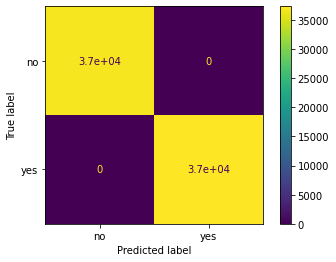

In [ ]:
# 1. KNN
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state=None, shuffle=True)

acc_knn = np.zeros(3)
micro = np.zeros((3,4))
macro = np.zeros((3,4))
counter = 0

for train_index, test_index in kf.split(flight, label_flight):
  print("TRAIN:", train_index, "TEST:", test_index)
  trainX, testX, trainY, testY = flight[train_index], flight[test_index], label_flight[train_index], label_flight[test_index]
  
  knn = KNeighborsClassifier(n_neighbors=1)
  knn.fit(trainX,trainY) 
  prediksi_knn = knn.predict(testX)
  acc_knn[counter] = accuracy_score(testY, prediksi_knn)

  micro[counter] = precision_recall_fscore_support(testY, prediksi_knn, average='micro')
  macro[counter] = precision_recall_fscore_support(testY, prediksi_knn, average='macro')

  counter += 1

print('\nAkurasi Rata-rata Testing KNN:', acc_knn.mean())

print("\nMicro")
print("mean prediction:\t{}".format(micro.T[0].mean()))
print("mean recall:\t\t{}".format(micro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(micro.T[2].mean())) 

print("\nMacro")
print("mean prediction:\t{}".format(macro.T[0].mean()))
print("mean recall:\t\t{}".format(macro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(macro.T[2].mean())) 

plot_confusion_matrix(knn, testX.round(), testY)

TRAIN: [     0      1      2 ... 222391 222393 222395] TEST: [     4      5      6 ... 222387 222392 222394]
TRAIN: [     0      1      2 ... 222392 222394 222395] TEST: [     3      7     12 ... 222390 222391 222393]
TRAIN: [     3      4      5 ... 222392 222393 222394] TEST: [     0      1      2 ... 222388 222389 222395]

Akurasi Rata-rata Testing DT: 1.0

Micro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0

Macro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0


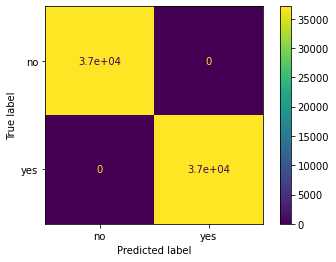

In [ ]:
# 2. Decision Tree
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state=None, shuffle=True)

acc_dt = np.zeros(3)
micro = np.zeros((3,4))
macro = np.zeros((3,4))
counter = 0

for train_index, test_index in kf.split(flight, label_flight):
  print("TRAIN:", train_index, "TEST:", test_index)
  trainX, testX, trainY, testY = flight[train_index], flight[test_index], label_flight[train_index], label_flight[test_index]
  
  dt = DecisionTreeClassifier()
  dt.fit(trainX, trainY)
  prediksi_dt = dt.predict(testX)
  acc_dt[counter] = accuracy_score(testY, prediksi_dt)

  micro[counter] = precision_recall_fscore_support(testY, prediksi_dt, average='micro')
  macro[counter] = precision_recall_fscore_support(testY, prediksi_dt, average='macro')

  counter += 1

print('\nAkurasi Rata-rata Testing DT:', acc_dt.mean())

print("\nMicro")
print("mean prediction:\t{}".format(micro.T[0].mean()))
print("mean recall:\t\t{}".format(micro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(micro.T[2].mean())) 

print("\nMacro")
print("mean prediction:\t{}".format(macro.T[0].mean()))
print("mean recall:\t\t{}".format(macro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(macro.T[2].mean())) 

plot_confusion_matrix(dt, testX.round(), testY)

TRAIN: [     1      2      4 ... 222392 222393 222395] TEST: [     0      3      7 ... 222388 222390 222394]
TRAIN: [     0      1      3 ... 222392 222393 222394] TEST: [     2      5      8 ... 222389 222391 222395]
TRAIN: [     0      2      3 ... 222391 222394 222395] TEST: [     1      4      6 ... 222386 222392 222393]

Akurasi Rata-rata Testing Random Forest: 1.0

Micro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0

Macro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0


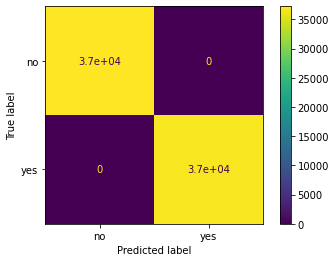

In [ ]:
# 3. Random Forest
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state=None, shuffle=True)

acc_rf = np.zeros(3)
micro = np.zeros((3,4))
macro = np.zeros((3,4))
counter = 0

for train_index, test_index in kf.split(flight, label_flight):
  print("TRAIN:", train_index, "TEST:", test_index)
  trainX, testX, trainY, testY = flight[train_index], flight[test_index], label_flight[train_index], label_flight[test_index]
  
  rf = RandomForestClassifier(n_estimators=100)
  rf.fit(trainX, trainY)
  prediksi_rf = rf.predict(testX)
  acc_rf[counter] = accuracy_score(testY, prediksi_rf)

  micro[counter] = precision_recall_fscore_support(testY, prediksi_rf, average='micro')
  macro[counter] = precision_recall_fscore_support(testY, prediksi_rf, average='macro')

  counter += 1

print('\nAkurasi Rata-rata Testing Random Forest:', acc_rf.mean())

print("\nMicro")
print("mean prediction:\t{}".format(micro.T[0].mean()))
print("mean recall:\t\t{}".format(micro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(micro.T[2].mean())) 

print("\nMacro")
print("mean prediction:\t{}".format(macro.T[0].mean()))
print("mean recall:\t\t{}".format(macro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(macro.T[2].mean())) 

plot_confusion_matrix(rf, testX.round(), testY)

TRAIN: [     0      3      4 ... 222390 222391 222395] TEST: [     1      2      9 ... 222392 222393 222394]
TRAIN: [     1      2      3 ... 222393 222394 222395] TEST: [     0      4      6 ... 222384 222389 222390]
TRAIN: [     0      1      2 ... 222392 222393 222394] TEST: [     3      5      7 ... 222388 222391 222395]

Akurasi Rata-rata Testing Gradient Boosting: 1.0

Micro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0

Macro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0


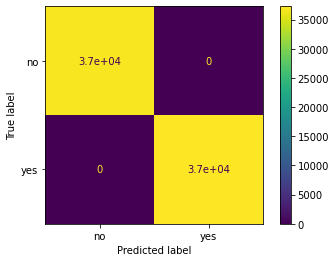

In [ ]:
# 4. Gradient Boosting
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state=None, shuffle=True)

acc_gb = np.zeros(3)
micro = np.zeros((3,4))
macro = np.zeros((3,4))
counter = 0

for train_index, test_index in kf.split(flight, label_flight):
  print("TRAIN:", train_index, "TEST:", test_index)
  trainX, testX, trainY, testY = flight[train_index], flight[test_index], label_flight[train_index], label_flight[test_index]
  
  gb = GradientBoostingClassifier()
  gb.fit(trainX, trainY)
  prediksi_gb = gb.predict(testX)
  acc_gb[counter] = accuracy_score(testY, prediksi_gb)

  micro[counter] = precision_recall_fscore_support(testY, prediksi_gb, average='micro')
  macro[counter] = precision_recall_fscore_support(testY, prediksi_gb, average='macro')

  counter += 1

print('\nAkurasi Rata-rata Testing Gradient Boosting:', acc_gb.mean())

print("\nMicro")
print("mean prediction:\t{}".format(micro.T[0].mean()))
print("mean recall:\t\t{}".format(micro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(micro.T[2].mean())) 

print("\nMacro")
print("mean prediction:\t{}".format(macro.T[0].mean()))
print("mean recall:\t\t{}".format(macro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(macro.T[2].mean())) 

plot_confusion_matrix(gb, testX.round(), testY)

TRAIN: [     2      3      4 ... 222390 222393 222394] TEST: [     0      1      8 ... 222391 222392 222395]
TRAIN: [     0      1      3 ... 222392 222394 222395] TEST: [     2      4      5 ... 222388 222389 222393]
TRAIN: [     0      1      2 ... 222392 222393 222395] TEST: [     3      7     10 ... 222387 222390 222394]

Akurasi Rata-rata Testing MLP: 1.0

Micro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0

Macro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0


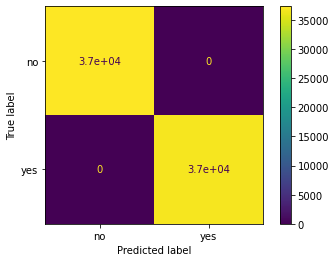

In [ ]:
# 5. MLP
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state=None, shuffle=True)

acc_mlp = np.zeros(3)
micro = np.zeros((3,4))
macro = np.zeros((3,4))
counter = 0

for train_index, test_index in kf.split(flight, label_flight):
  print("TRAIN:", train_index, "TEST:", test_index)
  trainX, testX, trainY, testY = flight[train_index], flight[test_index], label_flight[train_index], label_flight[test_index]
  
  mlp = MLPClassifier(hidden_layer_sizes=(80, ))
  mlp.fit(trainX, trainY)
  prediksi_MLP = mlp.predict(testX)
  acc_mlp[counter] = accuracy_score(testY, prediksi_MLP)

  micro[counter] = precision_recall_fscore_support(testY, prediksi_MLP, average='micro')
  macro[counter] = precision_recall_fscore_support(testY, prediksi_MLP, average='macro')

  counter += 1

print('\nAkurasi Rata-rata Testing MLP:', acc_mlp.mean())

print("\nMicro")
print("mean prediction:\t{}".format(micro.T[0].mean()))
print("mean recall:\t\t{}".format(micro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(micro.T[2].mean())) 

print("\nMacro")
print("mean prediction:\t{}".format(macro.T[0].mean()))
print("mean recall:\t\t{}".format(macro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(macro.T[2].mean())) 

plot_confusion_matrix(mlp, testX.round(), testY)

TRAIN: [     0      1      3 ... 222392 222393 222394] TEST: [     2      9     10 ... 222375 222385 222395]
TRAIN: [     2      6      9 ... 222393 222394 222395] TEST: [     0      1      3 ... 222388 222391 222392]
TRAIN: [     0      1      2 ... 222391 222392 222395] TEST: [     6     11     12 ... 222390 222393 222394]

Akurasi Rata-rata Testing Logistic Regression: 1.0

Micro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0

Macro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0


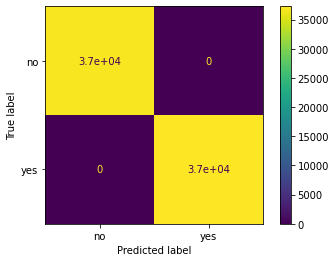

In [ ]:
# 6. Logistic Regression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state=None, shuffle=True)

acc_lr = np.zeros(3)
micro = np.zeros((3,4))
macro = np.zeros((3,4))
counter = 0

for train_index, test_index in kf.split(flight, label_flight):
  print("TRAIN:", train_index, "TEST:", test_index)
  trainX, testX, trainY, testY = flight[train_index], flight[test_index], label_flight[train_index], label_flight[test_index]
  
  lr = LogisticRegression(solver="lbfgs", multi_class="auto")
  lr.fit(trainX, trainY)
  prediksi_lr = lr.predict(testX)
  acc_lr[counter] = accuracy_score(testY, prediksi_lr)

  micro[counter] = precision_recall_fscore_support(testY, prediksi_lr, average='micro')
  macro[counter] = precision_recall_fscore_support(testY, prediksi_lr, average='macro')

  counter += 1

print('\nAkurasi Rata-rata Testing Logistic Regression:', acc_lr.mean())

print("\nMicro")
print("mean prediction:\t{}".format(micro.T[0].mean()))
print("mean recall:\t\t{}".format(micro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(micro.T[2].mean())) 

print("\nMacro")
print("mean prediction:\t{}".format(macro.T[0].mean()))
print("mean recall:\t\t{}".format(macro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(macro.T[2].mean())) 

plot_confusion_matrix(lr, testX.round(), testY)

TRAIN: [     1      2      3 ... 222393 222394 222395] TEST: [     0      5      9 ... 222379 222381 222392]
TRAIN: [     0      2      4 ... 222392 222393 222395] TEST: [     1      3      6 ... 222386 222389 222394]
TRAIN: [     0      1      3 ... 222389 222392 222394] TEST: [     2      4      7 ... 222391 222393 222395]

Akurasi Rata-rata Testing SVM: 1.0

Micro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0

Macro
mean prediction:	1.0
mean recall:		1.0
mean f1-score:		1.0


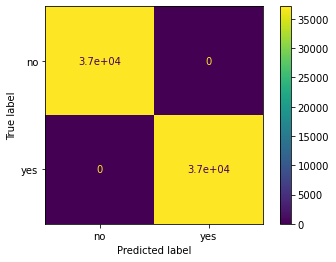

In [ ]:
# 7. SVM
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state=None, shuffle=True)

acc_svm = np.zeros(3)
micro = np.zeros((3,4))
macro = np.zeros((3,4))
counter = 0

for train_index, test_index in kf.split(flight, label_flight):
  print("TRAIN:", train_index, "TEST:", test_index)
  trainX, testX, trainY, testY = flight[train_index], flight[test_index], label_flight[train_index], label_flight[test_index]
  
  svm = SVC(kernel="rbf", gamma="auto")
  svm.fit(trainX, trainY)
  prediksi_svm = svm.predict(testX)
  acc_svm[counter] = accuracy_score(testY, prediksi_svm)

  micro[counter] = precision_recall_fscore_support(testY, prediksi_svm, average='micro')
  macro[counter] = precision_recall_fscore_support(testY, prediksi_svm, average='macro')

  counter += 1

print('\nAkurasi Rata-rata Testing SVM:', acc_svm.mean())

print("\nMicro")
print("mean prediction:\t{}".format(micro.T[0].mean()))
print("mean recall:\t\t{}".format(micro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(micro.T[2].mean())) 

print("\nMacro")
print("mean prediction:\t{}".format(macro.T[0].mean()))
print("mean recall:\t\t{}".format(macro.T[1].mean()))    
print("mean f1-score:\t\t{}".format(macro.T[2].mean())) 

plot_confusion_matrix(svm, testX.round(), testY)

BATAS AKHIR


In [ ]:
# %%time

# # for m in models:
# #     learning_model(m,flight,label_flight,test)
# # TEST TRAIN SPLIT
# # trainX, testX, _, testY = train_test_split(flight, label_flight, test_size = 0.078157972894815, random_state=0)
# # multi_trainY, _, _, _ = train_test_split(multi_label_flight, label_flight, test_size = 0.078157972894815, random_state=0)
# for m in models:
#     skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
#     # precisions = np.zeros((2,3))
#     # recalls = np.zeros((2,3))
#     # f1_scores = np.zeros((2,3))
#     # accuracies = np.zeros(3)
#     micro = np.zeros((3,4))
#     macro = np.zeros((3,4))
#     counter = 0
#     for train_index, test_index in skf.split(flight, label_flight):
#         print("TRAIN:", train_index, "\nTEST:", test_index)
#         trainX, testX, trainY, testY = flight[train_index], flight[test_index], label_flight[train_index], label_flight[test_index]
        
#         # print("KFolding #{}".format(counter + 1))
#         # trainX, testX, testY = flight[train_index], flight[test_index], label_flight[test_index]
#         # multi_trainY = multi_label_flight[train_index]
#         # report = learning_model(m,trainX,trainY,testX,testY)
#         report = learning_model(m,trainX,trainY,testX,testY)
#         micro[counter] = report[0]
#         macro[counter] = report[1]
          
# # #         no label
# #         precisions[0][counter] = float(report[74:78]) #no_precision
# #         recalls[0][counter] = float(report[84:88]) #no_recall
# #         f1_scores[0][counter] = float(report[94:98]) #no_f1_score
# # #         yes label
# #         precisions[1][counter] = float(report[128:132]) #yes_precision
# #         recalls[1][counter] = float(report[138:142]) #yes_recall
# #         f1_scores[1][counter] = float(report[148:152]) #yes_f1_score
# #         accuracies[counter] = float(report[203:207]) #accuracy_val
# #         counter += 1

#     print("Micro")
#     print("mean prediction:\t{}".format(micro.T[0].mean()))
#     print("mean recall:\t\t{}".format(micro.T[1].mean()))    
#     print("mean f1-score:\t\t{}".format(micro.T[2].mean()))   
#     print("Macro")
#     print("mean prediction:\t{}".format(macro.T[0].mean()))
#     print("mean recall:\t\t{}".format(macro.T[1].mean()))    
#     print("mean f1-score:\t\t{}\n".format(macro.T[2].mean()))   
#     # print("label ",label[0])
#     # print("mean prediction:\t{}".format(precisions[0].mean()))
#     # print("mean recall:\t\t{}".format(recalls[0].mean()))    
#     # print("mean f1-score:\t\t{}".format(f1_scores[0].mean()))    
#     # print("label ",label[1])
#     # print("mean prediction:\t{}".format(precisions[1].mean()))
#     # print("mean recall:\t\t{}".format(recalls[1].mean()))    
#     # print("mean f1-score:\t\t{}".format(f1_scores[1].mean()))
#     # print("\n")    
#     # print("mean accuracy:\t\t{}".format(accuracies.mean()))
#     # print("mean of all f1-score:\t{}\n".format((f1_scores[0].mean() + f1_scores[1].mean()) /2))
    

In [ ]:
# from sklearn.metrics import accuracy_score, plot_confusion_matrix

# trainX, testX, trainY, testY = train_test_split(flight, label_flight, test_size = 0.078157972894815, random_state=0)
# knn = KNeighborsClassifier(n_neighbors=1)
# knn.fit(trainX,trainY) 
# prediksi_knn = knn.predict(testX)
# acc_knn = accuracy_score(testY, prediksi_knn)
# print('Akurasi Testing KNN:', acc_knn)
# display(precision_recall_fscore_support(testY, prediksi_knn, average='micro'))
# display(precision_recall_fscore_support(testY, prediksi_knn, average='macro'))
# plot_confusion_matrix(knn, testX.round(), testY)

In [ ]:
# mlp = MLPClassifier(hidden_layer_sizes=(80, ))
# mlp.fit(trainX, trainY)
# prediksi_MLP = mlp.predict(testX)
# acc_MLP = accuracy_score(testY, prediksi_MLP)
# print('Akurasi Testing MLP:', acc_MLP)
# plot_confusion_matrix(mlp, testX.round(), testY)

In [ ]:
# from imblearn.over_sampling import SMOTE 
# sm = SMOTE(random_state = 2) 
# X_train_res, y_train_res = sm.fit_sample(trainX, trainY.ravel()) 
  
# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
# print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == "yes"))) 
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == "no")))

In [ ]:
# learning_model('random_forest',flight,multi_label_flight,test)
# learning_model('gradient_boosting',flight,multi_label_flight,test)
# learning_model('knn',flight,multi_label_flight,test)

In [ ]:
# Constructing the confusion matrix.
# from sklearn.metrics import confusion_matrix
# cf_X = testX
# cf_Y = testY
# count = 0
# for x in cf_Y :
#   if x == "no" :
#     cf_Y[count] = 0
#   elif x == "yes" :
#     cf_Y[count] = 1
#   count = count + 1
#   # if count > 10:
#   #   break
# print(cf_Y)

# mlp = MLPClassifier()
# mlp.fit(trainX,trainY) 
# confusion_matrix(mlp,testX.round(), testY)

In [ ]:
# # trainY
# cf_Y = trainY
# yes = 0
# no = 0
# count = 0
# for x in cf_Y :
#   if x == "no" :
#     no = no + 1
#   elif x == "yes" :
#     yes = yes + 1
#   count = count + 1
#   # if count > 10:
#   #   break
# print(yes,no)

In [ ]:
# cf_Y = trainY
# count = 0
# for x in cf_Y :
#   if x == 0 :
#     cf_Y[count] = "no"
#   elif x == 1 :
#     cf_Y[count] = "yes"
#   count = count + 1
#   # if count > 10:
#   #   break
# print(cf_Y)

In [ ]:
# from sklearn.metrics import accuracy_score, plot_confusion_matrix

# mlp = MLPClassifier()
# mlp.fit(trainX, trainY)
# prediksi_MLP = mlp.predict(testX)
# acc_MLP = accuracy_score(testY, prediksi_MLP)
# print('Akurasi Testing MLP:', acc_MLP)
# # plot_confusion_matrix(mlp, testX.round(), testY)
# display(precision_recall_fscore_support(testY,prediksi_MLP, average='macro'))
# display(precision_recall_fscore_support(testY,prediksi_MLP, average='micro'))

In [ ]:
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(trainX,trainY) 
# prediksi_knn = knn.predict(testX)
# acc_knn = accuracy_score(testY, prediksi_knn)
# print('Akurasi Testing KNN:', acc_knn)
# # plot_confusion_matrix(knn, testX.round(), testY)
# # display(precision_recall_fscore_support(testY,prediksi_knn, average='macro'))
# # display(precision_recall_fscore_support(testY,prediksi_knn, average='micro'))
# micro = precision_recall_fscore_support(testY,prediksi_knn, average='micro')
# print("mean prediction:\t{}".format(micro[0].mean()))
# print("mean recall:\t\t{}".format(micro[1].mean()))    
# print("mean f1-score:\t\t{}".format(micro[2].mean())) 

# macro = precision_recall_fscore_support(testY,prediksi_knn, average='macro')
# print("mean prediction:\t{}".format(macro[0].mean()))
# print("mean recall:\t\t{}".format(macro[1].mean()))    
# print("mean f1-score:\t\t{}".format(macro[2].mean())) 

In [ ]:
# %%time
# # for m in models:
# #     learning_model(m,flight,label_flight,test)

# for m in models:
#     skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
#     precisions = np.zeros((2,3))
#     recalls = np.zeros((2,3))
#     f1_scores = np.zeros((2,3))
#     accuracies = np.zeros(3)
#     counter = 0
#     for train_index, test_index in skf.split(flight, label_flight):
# #         print("TRAIN:", train_index, "\nTEST:", test_index)
#         print("KFolding #{}".format(counter + 1))
# #         trainX, testX, trainY, testY = flight[train_index], flight[test_index], label_flight[train_index], label_flight[test_index]
#         trainX, testX, testY = flight[train_index], flight[test_index], label_flight[test_index]
#         multi_trainY = multi_label_flight[train_index]
# #         report = learning_model(m,trainX,trainY,testX,testY)
#         report = learning_model(m,trainX,multi_trainY,testX,testY)
# #         no label
#         precisions[0][counter] = report[label[0]]['precision']
#         recalls[0][counter] = report[label[0]]['recall']
#         f1_scores[0][counter] = report[label[0]]['f1-score']
# #         yes label
#         precisions[1][counter] = report[label[0]]['precision']
#         recalls[1][counter] = report[label[0]]['recall']
#         f1_scores[1][counter] = report[label[0]]['f1-score']
#         accuracies[counter] = report['accuracy']
#         counter += 1
#     print("label ",label[0])
#     print("mean prediction:\t{}".format(precisions[0].mean()))
#     print("mean recall:\t\t{}".format(recalls[0].mean()))    
#     print("mean f1-score:\t\t{}".format(f1_scores[0].mean()))    
#     print("label ",label[1])
#     print("mean prediction:\t{}".format(precisions[1].mean()))
#     print("mean recall:\t\t{}".format(recalls[1].mean()))    
#     print("mean f1-score:\t\t{}".format(f1_scores[1].mean()))    
#     print("mean accuracy:\t\t{}".format(accuracies.mean()))
#     print("mean of all f1-score:\t{}\n".format((f1_scores[0].mean() + f1_scores[1].mean()) /2))

In [ ]:
# # learning_model('knn',trainX,trainY,testX,testY)
# label  no
# mean prediction:	0.9389274713021752
# mean recall:	0.809889332628468
# mean f1-score:	0.8696470721273467
# label  yes
# mean prediction:	0.9389274713021752
# mean recall:	0.809889332628468
# mean f1-score:	0.8696470721273467
# mean accuracy:	0.8786039317253908

In [ ]:
# report

In [ ]:
# type(report)

In [ ]:
# y_true = [0, 1, 2, 2, 2]
# y_pred = [0, 0, 2, 2, 1]
# target_names = ['class 0', 'class 1', 'class 2']
# hasil = classification_report(y_true, y_pred, target_names=target_names)
# print(hasil)

In [ ]:
# string = report
# print(string[14:23]) #precision
# print(string[27:33]) #recall
# print(string[35:43]) #f1-score
# print(string[46:53]) #support
# print(string[65:67]) #no
# print(string[74:78]) #no_precision
# print(string[84:88]) #no_recall
# print(string[94:98]) #no_f1
# print(string[103:108]) #no_support
# print(string[118:121]) #yes
# print(string[128:132]) #yes_precision
# print(string[138:142]) #yes_recall
# print(string[148:152]) #yes_f1
# print(string[158:162]) #yes_support
# print(string[168:176]) #accuracy
# print(string[203:207]) #accuracy_val

In [ ]:
df_trainX = pd.DataFrame(trainX)
df_trainY = pd.DataFrame(trainY)

# print(df_trainX.value_counts)
display(df_trainX)

# display(df_trainY)
print(df_trainY.value_counts())


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,2.752816,5.947384,1.0,5.736558,6.249013,6.615301,5.955300,6.013241,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.000000
1,2.783189,6.330363,2.0,5.744666,7.271515,9.458485,6.248662,6.422655,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.000000
2,2.621176,6.059437,1.0,6.059437,6.719632,6.947661,6.393460,6.470540,0.0,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.000000
3,2.692847,6.163495,1.0,6.163495,6.869818,7.201635,6.847672,6.724514,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.000000
4,2.600973,6.678813,4.0,6.275383,6.678813,7.070481,6.406835,6.468421,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148259,3.206948,6.393710,3.0,6.283324,6.470862,6.773247,6.428290,6.403709,0.0,0.0,0.0,1.0,1.0,3.610952,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.610952,0.389048
148260,2.733005,6.377611,2.0,6.365256,6.915797,7.206411,6.549572,6.667676,1.0,1.0,0.0,0.0,0.0,4.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.000000
148261,2.764587,5.957200,1.0,5.957200,6.611172,6.922514,6.284462,6.353218,0.0,0.0,0.0,0.0,0.0,3.000000,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.000000
148262,2.873886,6.082542,1.0,6.009758,6.926583,7.527746,6.812974,6.711671,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.000000


yes    74202
no     74062
dtype: int64


In [ ]:
display(testX)
display(testY)

array([[2.81157501, 6.43064739, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [2.72997429, 6.05347508, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [3.36548798, 5.99652481, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [2.94001816, 6.14886049, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [2.90496577, 6.69172188, 4.        , ..., 0.        , 0.        ,
        1.        ],
       [3.3320976 , 6.40458649, 2.        , ..., 0.        , 1.        ,
        0.        ]])

array(['no', 'no', 'no', ..., 'yes', 'yes', 'yes'], dtype=object)

In [ ]:
test.transpose()

order_id,5ca64fd80a069208e3c0aa05dd580fb8,aca60904549a8a5958fe7a642efcb534,1771011e3adec5db9f30d15b3d439711,6fc1b7d590c2a8c539ce56397403194d,c1f4712f60cd758e773555690d148764,508536e79dc45214527260a72ba6cfd2,509237c4877086023435f92278dde23e,56ab926701e5e424884b36e0554696a1,17789cce1dce4289c74ac79270f42050,b5b284b894e9a4a816c92a83e8a6d26a,456e397fd187a34d4114b0fe0191154d,8ec37a63b7fb8c08a68229110710239b,2ffef3e50ab469855723cd29980f28f3,4c62651bb6a22e5e06db4989ccf08567,e72baa2554a8768cb33a4d86825dd642,89fc2afec3bc9fa6bfc13b0ac87db621,b66cc93117b7e0578182167833ecc37d,a9bbe9c4de94303cae847dafb161a102,afdb692d7402b39dc5bd0d10be8b853b,f576016b27e78b9f9d0d96c661b0e3a7,e4499038b4eb1f89a37dcec2bf1e6ccb,f727994baaaf59086e72905cd9709e58,56f3658effb2dff3c72fb53749fa6240,95d1134bd2ed4e916467b2fb8daff4bd,be97f320e0e7d55f39ff95b292b0cdfc,34c6fa26425dbe8be04213204d8e8ba1,5556c0b6487fd0eee426057d297c4741,9aca7dc8b3a1d69f1c9c26b3b07c0dcb,d431c8a6b585186a69a3253c2ec29389,edff42b996d046b887ffb47f7a65159c,e130a03e3914d87baf6fe454082fab17,7a25dbd51905477244845f659b332ab0,c1aedfe45902678a9a40a7b789285cfd,ae60140baba80138f45164af03c5b2ce,2e1de9b2bb1e8b2f2afba0e901485cc3,c8cdb4b607379ba4020ddbad6582eb0f,bdbe25e0407e3ef1f5741cb09e3b9d2a,2ab652dfa928e8d0f8a2464a9beac35a,955731d96e683cedf5a4dddbe974ff48,e154251c96edd875a3679644ac320d83,...,913d20c6e3b0f87932efb32ad5e66beb,6d290e3e1e6ed01cdcf3587af7223a68,2f64c20bb1f0bbb03b4cf34cb0532ef7,50217b015eb77021e25d828cf5286531,30f071ffbf0fa00ff3309e845561f29a,58a8aad9f6ba3a145210fd5513a8cd68,dc84b5baf40b7f8411fae88f02233ded,a2ab5f3d4e4946f27d3706c868c98d48,0fe5d6ac5e918905464406bc0d49fdf8,c75409a736d2c976e9f9a8c6bbc7e9ff,21bfbb26cf9c6d3ac00a5a9ddbc81eb0,bd364974a2bd2a49fb9f2ad871433c9c,146dfb29f649f84c4a9a4fdb1e773730,56f994c242d08c14a2a5b4773c069970,377d7292bd0ae5cdb9bb6694851a74be,6c60fc984b4830bbf6a568bd5ee66839,b0401b49e2458725f12fde2a396ed6c9,c31a6ab2d472f1980e8a58237ce26a0a,adb94903ebe69dcfd61bbc2cc86ad26f,950b5ddc51eb75cedeb6cb7e1b8ba42d,b0e9c778af26c741b2193fe64a275d35,853210452e490fa981dd44b69e2c0ca2,eb168f0689a8607c3106987693c37f83,b512b45ede76427007ca7c75089adf02,8d1d52854d12b749aa2a135c506b017a,8d6b6544d554731edae81bd5e64fb2dd,fae0933670b3cb36bc45fa1256c54141,715774efbbed66d69c79b68ab09979de,6ebbde40f2891952715dbef650508c21,b1aef435e05d6483d8e33f4f0570c26a,37d792021bcb5706661a42cf62fd674d,62e08cdbbe10f200a4b36b735b19a10d,8b9695b15bf9a1ef33fa2312090c0c65,53a99d910b93ec2aefb4878a6ae28a66,d38e3226d6f43477e13210d29ce491d0,a3a06ed271bd87f0e987be26f8f200f8,2d4ba920b453a22e079c0888acea9bba,f22e17eebf2b7305906161b517391aef,f981b0ea71a2674216078c22f6d8ec52,a4f15d0c7bf60abbc761f05cf17006a9
member_duration_days,3.244030,3.035029,3.376212,2.760422,2.935507,2.737193,2.768638,2.856729,2.843233,3.038620,2.913284,2.754348,3.373831,2.733999,3.219323,2.557507,2.788875,3.198382,3.070038,2.830589,3.103804,2.848189,3.215902,2.582063,2.801404,2.691081,2.726727,3.340047,3.219846,2.805501,2.745075,2.677607,2.968950,2.830589,3.256237,2.812913,2.812245,2.714330,3.354108,2.708421,...,2.672098,3.136721,3.283753,3.278067,2.754348,2.757396,2.808886,2.555094,3.345962,3.070407,2.777427,2.853090,2.565848,2.881955,2.786041,2.717671,2.589950,3.250664,2.713491,3.364551,3.092721,2.963316,2.907949,2.710117,3.402261,2.786751,2.890421,3.322012,3.244277,2.835691,3.051538,3.220370,2.806180,3.102091,3.143327,2.706718,3.331630,3.238548,2.865696,2.788875
price,6.497400,6.335780,6.093287,6.297555,6.475762,6.604956,6.212433,6.218314,6.413429,6.093287,6.165959,6.346482,6.244251,6.748501,6.645524,6.729494,5.991839,6.266030,5.996525,6.023322,6.167905,6.154230,6.220440,5.995117,6.435602,7.069071,6.178641,5.970690,6.377752,6.193559,5.975221,6.848459,6.146441,6.340659,6.271720,6.936498,6.208799,6.447471,5.955591,6.734243,...,6.426379,6.100800,6.306706,6.265054,6.526347,6.637482,6.244251,6.627214,5.969668,6.321658,6.307073,6.035422,6.317474,6.660720,6.522657,5.924156,6.711574,6.168901,6.309054,6.774676,5.823713,6.304163,6.574240,6.354505,6.378950,6.25048